# Table of Contents
[1. Objectives and Structure](#1)<br>
[2. Data Sets](#2)<br>
[3. Demo](#3)<br>
&nbsp;&nbsp;&nbsp;[3.1 Feature Engineering and Data Cleaning](#4)<br>
&nbsp;&nbsp;&nbsp;[3.2 Univariate Analysis](#5)<br>
&nbsp;&nbsp;&nbsp;[3.3 Multivariate Analysis](#6)<br>
[4. Firmo](#7)<br>
&nbsp;&nbsp;&nbsp;[4.1 Feature Engineering and Data Cleaning](#8)<br>
&nbsp;&nbsp;&nbsp;[4.2 Univariate Analysis](#9)<br>
&nbsp;&nbsp;&nbsp;[4.3 Multivariate Analysis](#10)<br>

<hr class="solid">

# 1. Objectives and Structure
<a id="1"></a> 


**Main goal:** produce a  comprehensive  report  that  identifies  the  **main  customer  segments**,  accompanied  by  a **preliminary marketing plan** that will serve as a guide for future initiatives.

- Costumer Value segmentation
- Costumer Behavior segmentation

**Structure**
- **Exploration**: Population description  using statistical measures, visualizations, and business insights that reflect the most significant findings.
<br></br>
- **Preprocessing:** steps to transform raw data into prepared data for clustering:<br> &nbsp;&nbsp;-data cleaning, <br>&nbsp;&nbsp;-transformation(feature engineering)<br>&nbsp;&nbsp;-reduction.
<br></br>
- **Modelling:**  Implementation  of ML models.<br> &nbsp;&nbsp; **Obligatory:** costumer value & consumer  behavior

<hr class="solid">


# 2. Data Sets
<a id="2"></a> 

### Firmo


| Variable | Description |
| --- | --- |
| CustomerID | Customer unique identification |
| Date_Adherence | Date of customer adherence to company’s card |
| Recency | Number of days since the customer's last purchase |
| MntMeat&Fish | Amount spent on meat and fish dishes |
| MntEntries | Amount spent on entries |
| MntVegan&Vegetarian | Amount spent on Vegan and Vegetarian dishes |
| MntDrinks | Amount spent on drinks |
| MntDesserts | Amount spent on desserts |
| MntAdditionalRequests | Amount spent on additional requests |
| NumOfferPurchases | Number of purchases made using promotional offers |
| NumAppPurchases | Number of purchases made through food delivery apps |
| NumTakeAwayPurchases | Number of take-away purchases |
| NumInStorePurchases | Number of in-store purchases |
| NumAppVisitsMonth | Average number of accesses to the restaurant in food delivery apps |
| Complain | Flag indicating whether the customer has made a complaint |


### Demo


| Variable | Description |
| --- | --- |
| CustomerID | Customer unique identification |
| Name | Customer’s name |
| Birthyear | Customer’s year of birth |
| Education | Customer’s level of education |
| Marital_Status | Customer’s marital status |
| Income | Customer’s yearly household income |
| Kid_Younger6 | Number of kids younger than 6 in the household |
| Children_6to18 | Number of children between 6 and 18 years old in the household |


### Marketing

| Variable | Description |
| --- | --- |
| CustomerID | Customer unique identification |
| Response_Cmp1 | Flag indicating whether the customer accepted the offer in campaign 1 |
| Response_Cmp2 | Flag indicating whether the customer accepted the offer in campaign 2 |
| Response_Cmp3 | Flag indicating whether the customer accepted the offer in campaign 3 |
| Response_Cmp4 | Flag indicating whether the customer accepted the offer in campaign 4 |
| Response_Cmp5 | Flag indicating whether the customer accepted the offer in campaign 5 |

<hr class="solid">

### Imports
<a id="3"></a> 

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

<hr class="solid">

### Data Import and Indexing

In [75]:
demo = pd.read_csv("data/crm.csv")
mkt = pd.read_csv("data/mkt.csv")
sales = pd.read_excel("data/sales.xlsx")
df = demo.merge(sales, on='CustomerID').merge(mkt,on='CustomerID')

df = df.set_index('CustomerID')
demo = demo.set_index('CustomerID')
mkt = mkt.set_index('CustomerID')
sales = sales.set_index('CustomerID')

### Check and drop Duplicates

In [76]:
df[df.duplicated()].shape[0]  # 31 duplicates
df.drop_duplicates(inplace=True)

# 1. Data Exploration

## 1.1 General Description

In [77]:
df.shape

(7000, 26)

In [78]:
print(df.dtypes)               #Variable TYpes
df.dtypes.value_counts()       #Number of var types

Name                      object
Birthyear                  int64
Education                 object
Marital_Status            object
Income                   float64
Kid_Younger6               int64
Children_6to18             int64
Date_Adherence            object
Recency                  float64
MntMeat&Fish             float64
MntEntries                 int64
MntVegan&Vegetarian      float64
MntDrinks                float64
MntDesserts              float64
MntAdditionalRequests    float64
NumOfferPurchases          int64
NumAppPurchases            int64
NumTakeAwayPurchases       int64
NumStorePurchases          int64
NumAppVisitsMonth          int64
Complain                   int64
Response_Cmp1              int64
Response_Cmp2              int64
Response_Cmp3              int64
Response_Cmp4              int64
Response_Cmp5              int64
dtype: object


int64      15
float64     7
object      4
dtype: int64

## 1.2 Statistical Exploration 

### Numeric Vars

In [79]:
df.describe() 

Birthyear         Income  Kid_Younger6  Children_6to18      Recency  \
count  7000.000000    7000.000000   7000.000000     7000.000000  6977.000000   
mean   1976.451429   77988.962407      0.440571        0.490571    49.235058   
std      11.996270   35409.810253      0.543477        0.542174    28.922688   
min    1948.000000    2493.800000      0.000000        0.000000     0.000000   
25%    1967.000000   51586.250000      0.000000        0.000000    24.000000   
50%    1977.000000   77190.000000      0.000000        0.000000    49.000000   
75%    1985.000000  102016.250000      1.000000        1.000000    74.000000   
max    2005.000000  237639.725000      2.000000        2.000000    99.000000   

       MntMeat&Fish   MntEntries  MntVegan&Vegetarian    MntDrinks  \
count   7000.000000  7000.000000          7000.000000  6972.000000   
mean    3079.523800   534.749429          2785.050786   545.657544   
std     3370.377166   787.846684          3908.718244   805.149088   
min        0.000000     0.000000             0.000000     0.000000   
25%      250.000000    40.000000           240.000000    40.000000   
50%     1820.000000   180.000000          1110.000000   180.000000   
75%     5070.000000   680.000000          3795.000000   700.000000   
max    14980.000000  3980.000000         25974.000000  3980.000000   

       MntDesserts  MntAdditionalRequests  NumOfferPurchases  NumAppPurchases  \
count  7000.000000            7000.000000        7000.000000      7000.000000   
mean    540.656029              42.556186           2.448429         6.015714   
std     802.221866              49.650747           2.306968         2.745537   
min       0.000000               0.000000           0.000000         0.000000   
25%      40.000000               9.000000           1.000000         4.000000   
50%     180.000000              24.000000           2.000000         6.000000   
75%     680.000000              57.000000           3.000000         8.000000   
max    3980.000000             249.000000          16.000000        13.000000   

       NumTakeAwayPurchases  NumStorePurchases  NumAppVisitsMonth  \
count           7000.000000        7000.000000        7000.000000   
mean               3.834571           5.790571           5.278286   
std                3.331142           3.295708           2.748596   
min                0.000000           0.000000           0.000000   
25%                1.000000           3.000000           3.000000   
50%                3.000000           5.000000           5.000000   
75%                5.000000           8.000000           7.000000   
max               24.000000          13.000000          20.000000   

          Complain  Response_Cmp1  Response_Cmp2  Response_Cmp3  \
count  7000.000000    7000.000000    7000.000000    7000.000000   
mean      0.010286       0.079143       0.073286       0.083000   
std       0.100903       0.269981       0.260624       0.275902   
min       0.000000       0.000000       0.000000       0.000000   
25%       0.000000       0.000000       0.000000       0.000000   
50%       0.000000       0.000000       0.000000       0.000000   
75%       0.000000       0.000000       0.000000       0.000000   
max       1.000000       1.000000       1.000000       1.000000   

       Response_Cmp4  Response_Cmp5  
count    7000.000000    7000.000000  
mean        0.065857       0.014286  
std         0.248050       0.118675  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000       1.000000

- *Continuous variables*: 
  - Income : Probable distribution problems (skeness and kustosis) bcs huge sdt and mean and median quite different
  - Recency : Missing values; Big std - possible outliers or just big spread in data
  - MntMeat&Fish : Probable distribution problems (skeness and kustosis) bcs huge sdt and mean and median quite different
  - MntEntries : Probable distribution problems (skeness and kustosis) bcs huge sdt and mean and median quite different
  - MntVegan&Vegetarian : Probable distribution problems (skeness and kustosis) bcs huge sdt and mean and median quite different
  - MntDrinks :Missing values; Probable distribution problems (skeness and kustosis) bcs huge sdt and mean and median quite different
  - MntDesserts : Probable distribution problems (skeness and kustosis) bcs huge sdt and mean and median quite different
  - MntAdditionalRequests: Probable distribution problems but not has serious
  
- *Discret variables*: 
  - Birthyear - high std may imply a high spread and variability in the data
  - NumOfferPurchases - Probable distribution problems (skeness and kustosis) - might have some extreme values since max is 16 and mena is around 2.
  - NumTakeAwayPurchases - Probable distribution problems (skeness and kustosis) -max (24) really high comparing to the mean, possible outliers

Note: Complain, Response_Cmp1,	Response_Cmp2,	Response_Cmp3,	Response_Cmp4,	Response_Cmp5 - are coded as numeric but they are categorical vars and will be explored in their respective section


#### Skewness

In [80]:
df.skew()

Birthyear               -0.092478
Income                   0.844721
Kid_Younger6             0.693587
Children_6to18           0.451693
Recency                  0.017676
MntMeat&Fish             1.148862
MntEntries               2.087220
MntVegan&Vegetarian      2.486897
MntDrinks                2.046308
MntDesserts              2.057811
MntAdditionalRequests    1.826522
NumOfferPurchases        2.860514
NumAppPurchases          0.525873
NumTakeAwayPurchases     2.254158
NumStorePurchases        0.623254
NumAppVisitsMonth        1.005192
Complain                 9.709429
Response_Cmp1            3.118572
Response_Cmp2            3.275500
Response_Cmp3            3.023677
Response_Cmp4            3.501448
Response_Cmp5            8.187993
dtype: float64

- *Continuous variables*: 
    - As proposed previously all continuous variables are sekwed but Recency. Surpassing the threeshhold of 1, caracteristic of a normal dist, and with a positive value, meaning skewed to te right
- *Discret variables*: 
    - As proposed, the two variables are skewed 

#### Kurtosis

In [81]:
df.kurt()

Birthyear                -0.857341
Income                    2.649035
Kid_Younger6             -0.651127
Children_6to18           -0.973333
Recency                  -1.197978
MntMeat&Fish              0.532098
MntEntries                4.096167
MntVegan&Vegetarian       8.431538
MntDrinks                 3.839256
MntDesserts               3.813464
MntAdditionalRequests     3.084190
NumOfferPurchases        10.997946
NumAppPurchases          -0.222899
NumTakeAwayPurchases      8.582138
NumStorePurchases        -0.694327
NumAppVisitsMonth         4.992870
Complain                 92.299387
Response_Cmp1             7.727700
Response_Cmp2             8.731398
Response_Cmp3             7.144665
Response_Cmp4            10.263068
Response_Cmp5            65.061813
dtype: float64

Ref value of normal dist Abs(3)  

- MntEntries , MntDrinks , MntDesserts, NumAppVisitsMonth  - Kurtosis suggest a moderate peak and tails, require further exploring
- MntVegan&Vegetarian, NumOfferPurchases, NumTakeAwayPurchases   - are extremely peaked and has extremely heavy tail(s).

### Categorical Vars

In [82]:
df[['Name','Education', 'Marital_Status','Complain','Response_Cmp1','Response_Cmp2','Response_Cmp3', 'Response_Cmp4','Response_Cmp5']].astype('object').describe()

Name   Education Marital_Status  Complain  Response_Cmp1  \
count                7000        6986           7000      7000           7000   
unique               6241           9             10         2              2   
top     Mr. Stewart Grant  Graduation        Married         0              0   
freq                    3        3497           2830      6928           6446   

        Response_Cmp2  Response_Cmp3  Response_Cmp4  Response_Cmp5  
count            7000           7000           7000           7000  
unique              2              2              2              2  
top                 0              0              0              0  
freq             6487           6419           6539           6900

- Name - Check if all have a Mr. or Mrs. to create a Gender col
- Education - Missing Values; Check categories - Capitalization issues, and maybe can group some categories into more meanigfull ones,  depending on business needs
- Marital_Status - Check categories - Capitalization issues, and maybe can group some categories into more meanigfull ones, depending on business needs
- Very little complaints
- Low number of customers acepting capaign offers
- No aparent incongruencies

In [83]:
df.Education.value_counts()

Graduation    3497
PhD           1494
Master        1135
HighSchool     663
Basic          179
master           7
graduation       7
phd              2
highschool       2
Name: Education, dtype: int64

In [84]:
df.Marital_Status.value_counts()

Married     2830
Together    1683
Single      1525
Divorced     637
Widow        243
married       36
together      23
single        13
divorced       8
widow          2
Name: Marital_Status, dtype: int64

## 1.3 Visual Exploration

### Numeric Vars

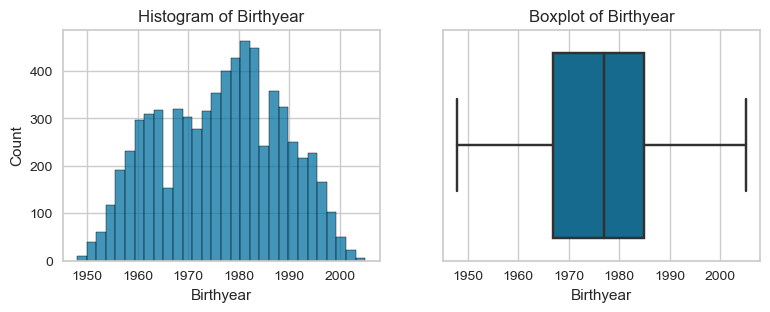

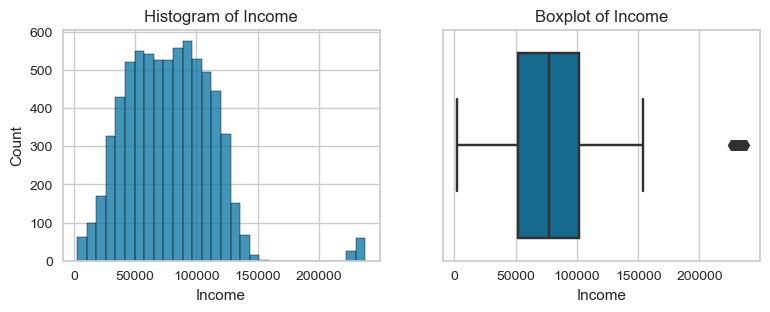

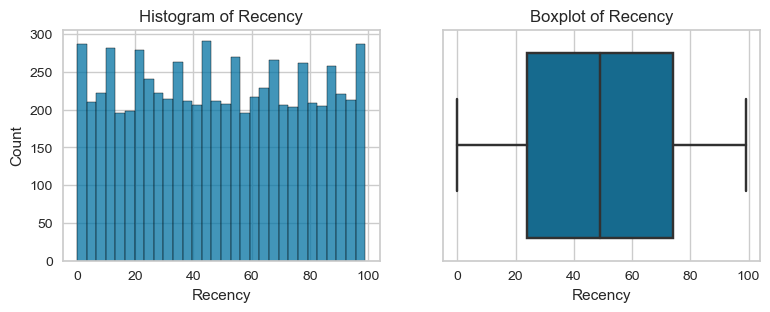

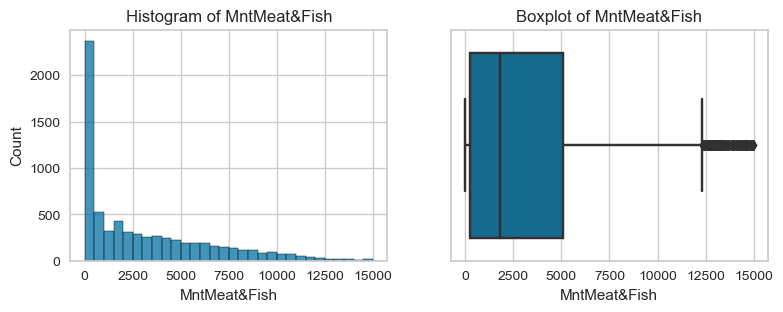

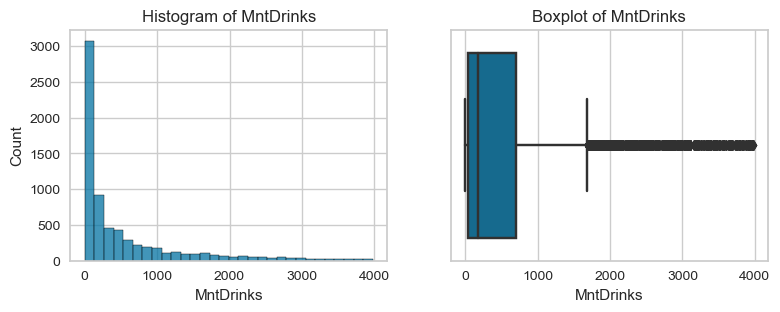

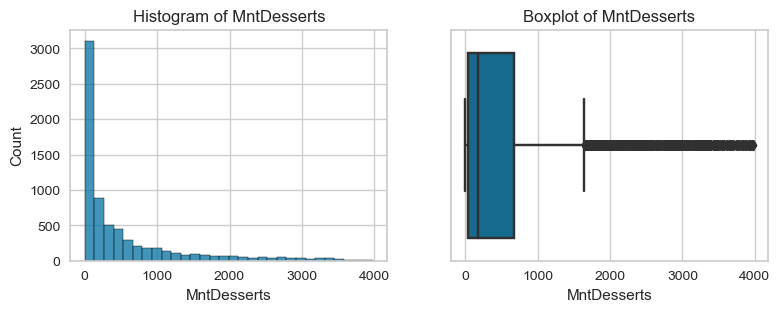

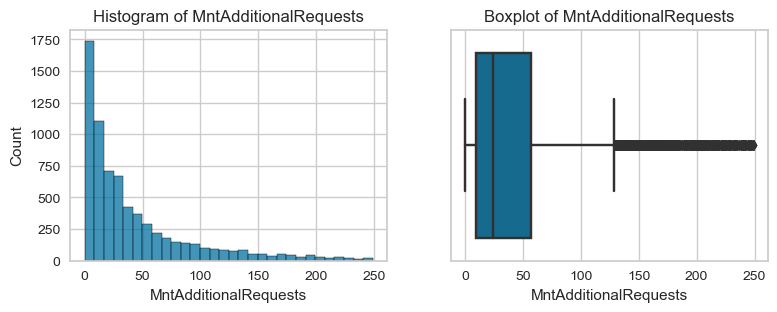

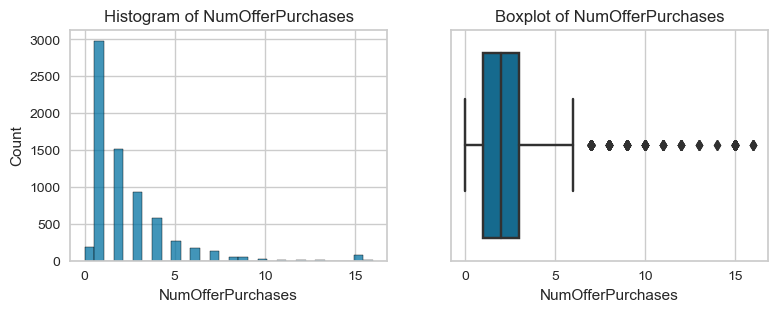

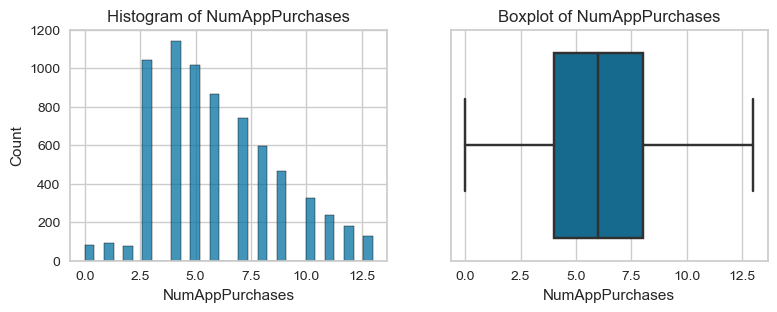

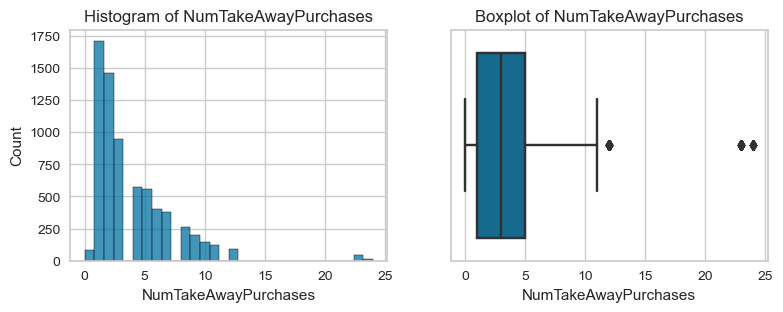

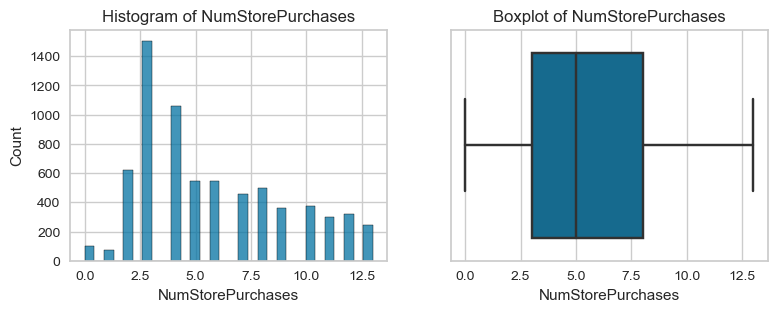

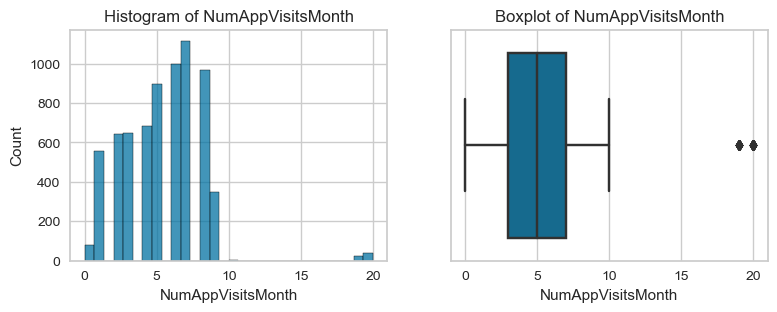

In [85]:
numeric = df[['Birthyear','Income','Recency', 'MntMeat&Fish' ,'MntEntries' ,
               'MntVegan&Vegetarian', 'MntDrinks', 'MntDesserts','MntAdditionalRequests','NumOfferPurchases', 'NumAppPurchases', 'NumTakeAwayPurchases', 
               'NumStorePurchases', 'NumAppVisitsMonth']]

for i in numeric:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3))
    sns.histplot(ax=ax1, x=df[i], bins=30)
    sns.boxplot(ax=ax2, x=df[i])
    ax1.set_title(f"Histogram of {i}")
    ax2.set_title(f"Boxplot of {i}")
    plt.show()

-	Income – Have some extreme values that can be considered outliers ( > 200k)
-	Recency - uniform distribution – perhaps can benefit from scaling.
-	MntMeat&Fish, MntEntries, MntDrinks, MntDesserts, MntAdditionalRequests, - don’t seem to have outliers and extreme values but are skewed to the right - perhaps can benefit from transformation (maybe log since it’s to the right and don’t have negative values)
-	MntVegan&Vegetarian – Have some extreme values (>200k), probably Vegan customers that don’t eat anything outside this category
-	NumOfferPurchases – is skewed to the right with a few extreme values – needs further exploration to provide context
-	NumAppPurchases, NumStorePurchases – Have some lower counts from 0 to 2- require contextualization
-	NumTakeAwayPurchases – Have some extreme values (>20), maybe customers that uses exclusively the takeout service – requires further exploring
-	NumAppVistitsMonth – Have some extreme values (>15), possible outliers



<AxesSubplot:>

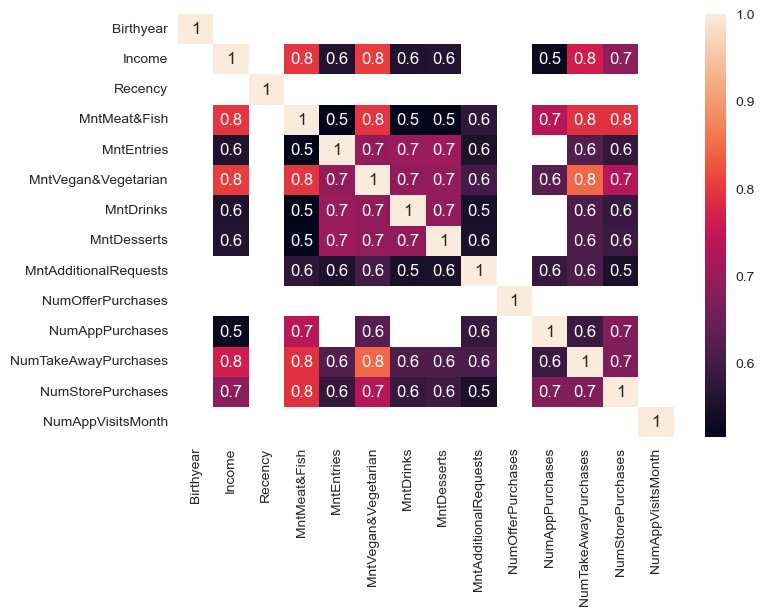

In [86]:
corr = numeric.corr(method='spearman')
sns.heatmap(data=corr[corr >0.5], annot=True, fmt = '.1g')

- No perfect correlations
- Income has significant correlations with almost every var
- All food type vars correlate with each other
- Channel: While store and takeaway correlate with Drinks and desserts, app doesn't
- Usadge of offer/campaigns, "Age", Recency, App visits -  doesn't seem to be correlated with anything


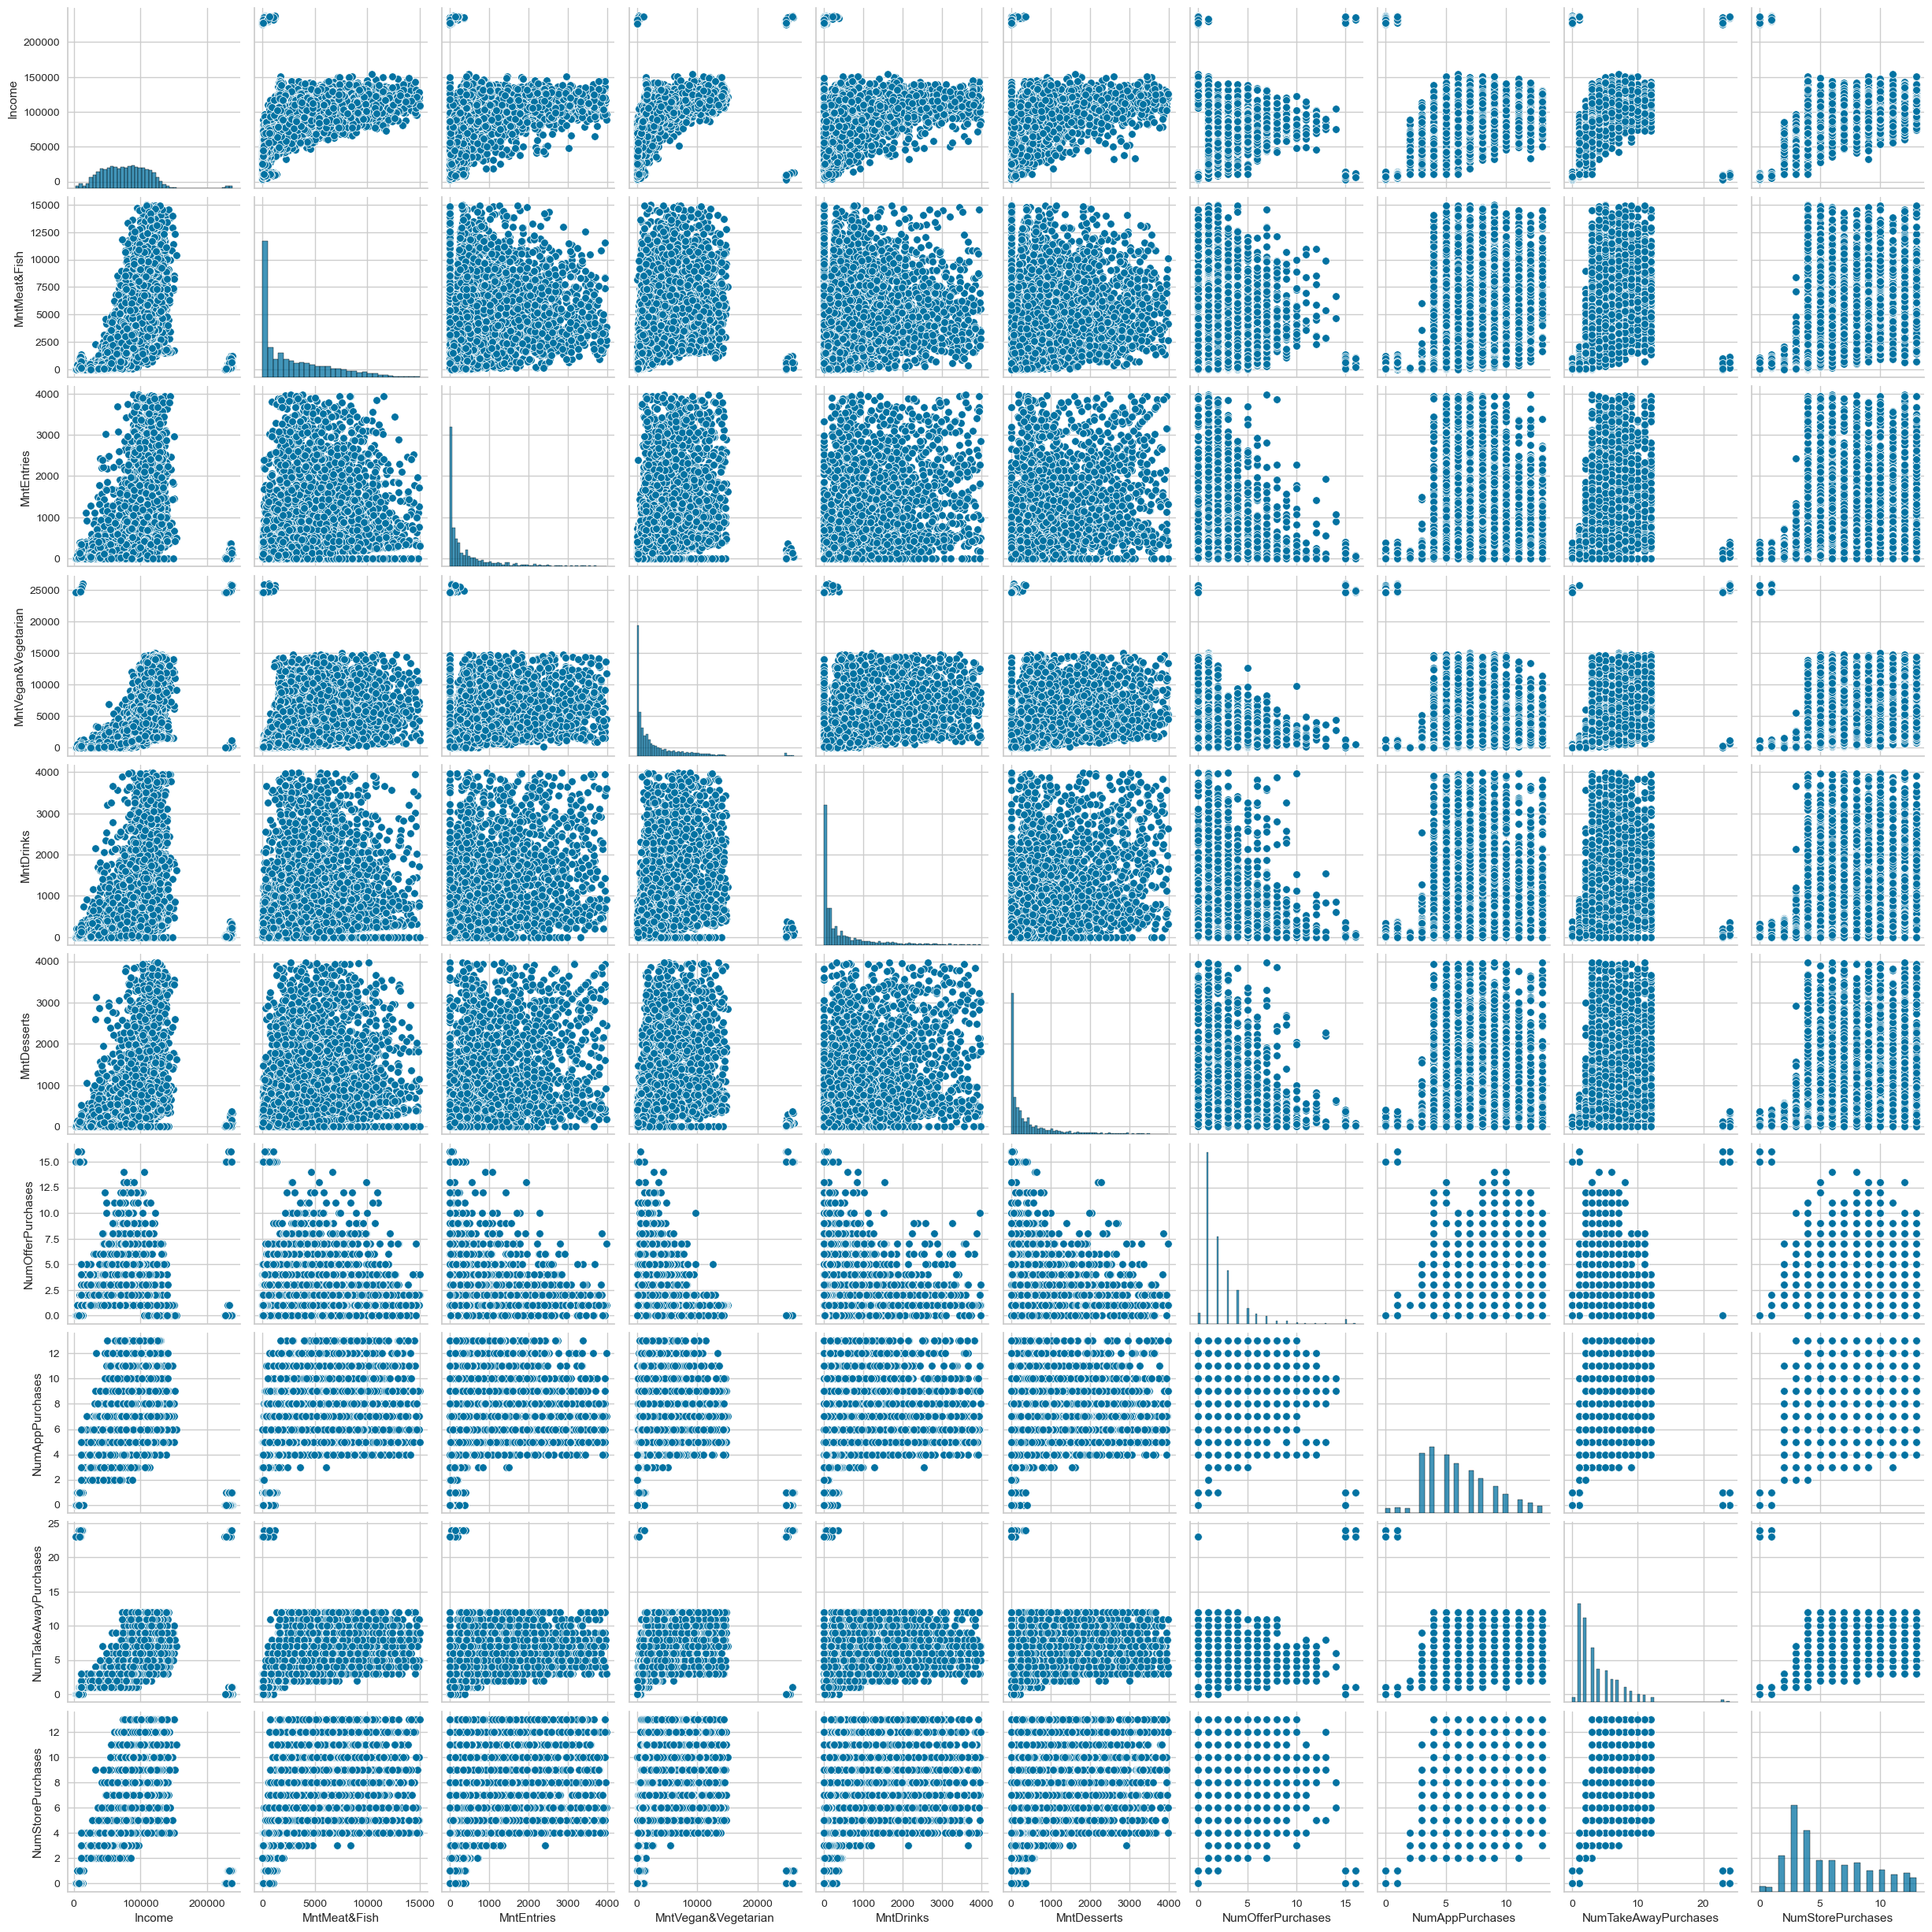

In [87]:
scatterview = df[['Income', 'MntMeat&Fish', 'MntEntries','MntVegan&Vegetarian', 'MntDrinks', 'MntDesserts', 'NumOfferPurchases', 'NumAppPurchases','NumTakeAwayPurchases', 'NumStorePurchases']]
sns.pairplot(scatterview)

- Scatter graphs enable us to vizualize the relationships implied by the correlations heatmap as well as some extreme values that could be potencial outliers
- There's no visible clusters so we'll defenitly need ML algorithms to find patterns in the data

### Numeric Vars

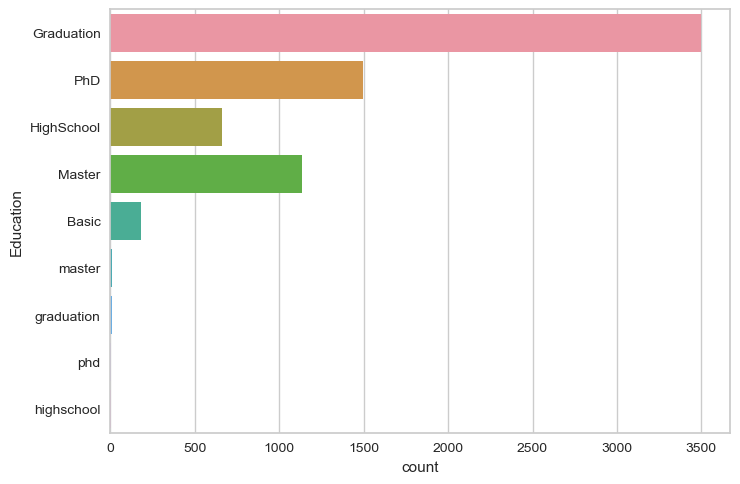

Graduation    3497
PhD           1494
Master        1135
HighSchool     663
Basic          179
master           7
graduation       7
phd              2
highschool       2
Name: Education, dtype: int64


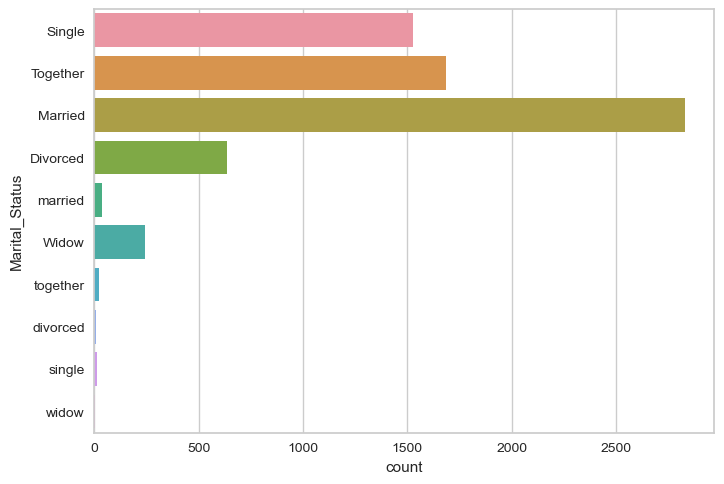

Married     2830
Together    1683
Single      1525
Divorced     637
Widow        243
married       36
together      23
single        13
divorced       8
widow          2
Name: Marital_Status, dtype: int64


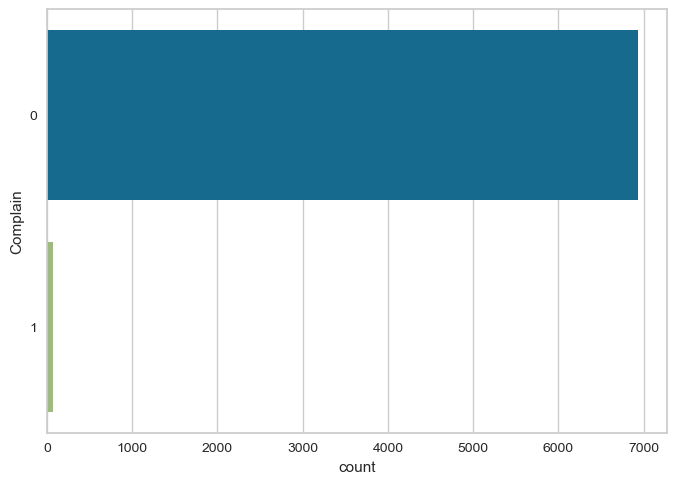

0    6928
1      72
Name: Complain, dtype: int64


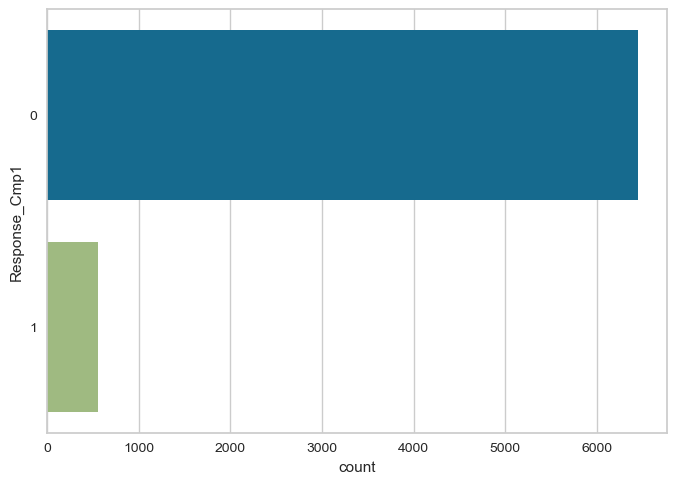

0    6446
1     554
Name: Response_Cmp1, dtype: int64


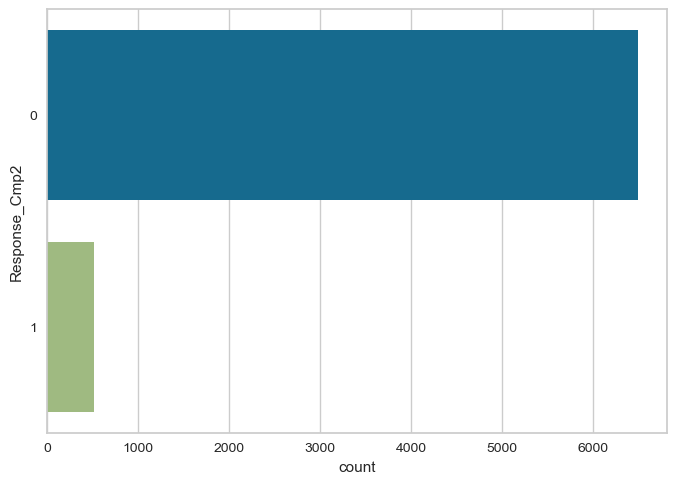

0    6487
1     513
Name: Response_Cmp2, dtype: int64


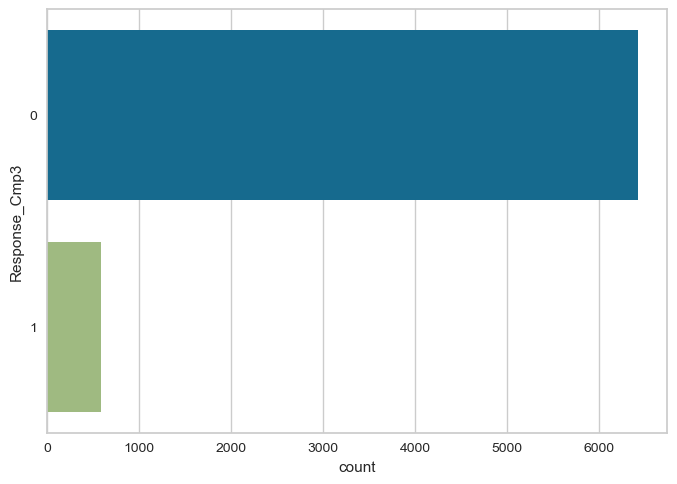

0    6419
1     581
Name: Response_Cmp3, dtype: int64


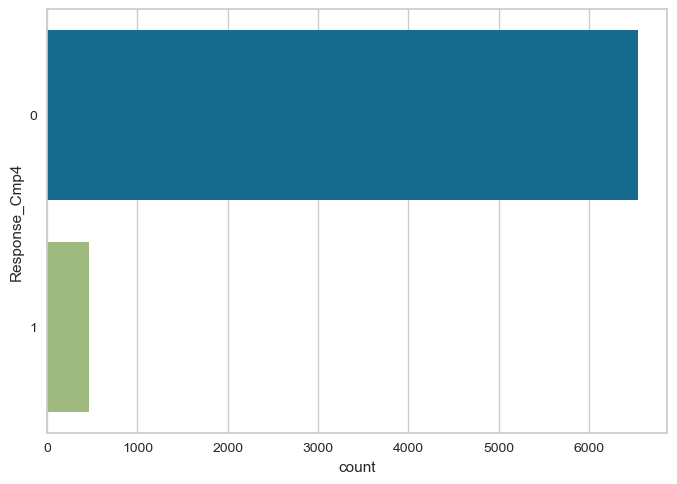

0    6539
1     461
Name: Response_Cmp4, dtype: int64


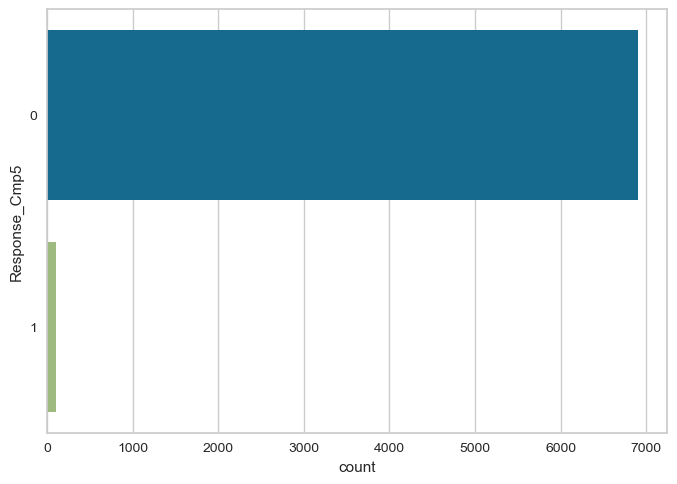

0    6900
1     100
Name: Response_Cmp5, dtype: int64


In [88]:
categorical = df[['Education', 'Marital_Status','Complain','Response_Cmp1','Response_Cmp2','Response_Cmp3', 'Response_Cmp4','Response_Cmp5']].astype('object')

for i in categorical.columns:
    sns.countplot(data=categorical, y=i)
    plt.show()
    print(categorical[i].value_counts())




# 2. Data Cleaning

## 2.1 Outliers

Based on kurtosis and distribution analysis we identify the following vars that may contain outliers:

- NumAppVisitsMonth
- MntVegan&Vegetarian
- NumOfferPurchases
- NumTakeAwayPurchases  
- Income


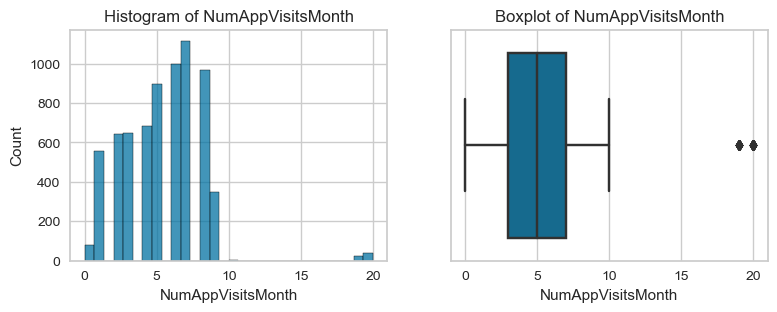

In [89]:
var = 'NumAppVisitsMonth'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3))
sns.histplot(ax=ax1, x=df[var], bins=30)
sns.boxplot(ax=ax2, x=df[var])
ax1.set_title(f"Histogram of {var}")
ax2.set_title(f"Boxplot of {var}")
plt.show()

In [90]:
df[df.NumAppVisitsMonth >= 19].mean()

Birthyear                1977.312500
Income                   8375.621875
Kid_Younger6                0.390625
Children_6to18              0.437500
Recency                    51.109375
MntMeat&Fish              383.729688
MntEntries                 74.093750
MntVegan&Vegetarian       359.554688
MntDrinks                  77.181250
MntDesserts                73.840625
MntAdditionalRequests       5.212500
NumOfferPurchases           7.796875
NumAppPurchases             0.546875
NumTakeAwayPurchases        0.343750
NumStorePurchases           0.484375
NumAppVisitsMonth          19.609375
Complain                    0.015625
Response_Cmp1               0.156250
Response_Cmp2               0.140625
Response_Cmp3               0.140625
Response_Cmp4               0.093750
Response_Cmp5               0.015625
dtype: float64

When comparing customers with less then 19 app visits with customers with at least 19 visits(64), the latter group have quite low nr of purchases (channel idenpendent) and hogh number of NumOfferPurchases in average. This could suggest that this is a group of people that check multiple times the app but only order  when there's a cupon/discount code active. 

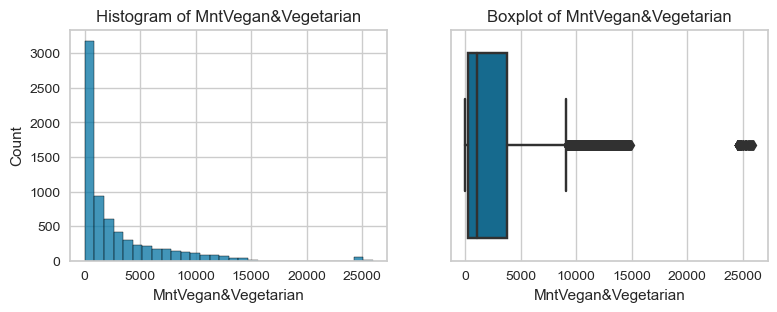

In [91]:
var = 'MntVegan&Vegetarian'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3))
sns.histplot(ax=ax1, x=df[var], bins=30)
sns.boxplot(ax=ax2, x=df[var])
ax1.set_title(f"Histogram of {var}")
ax2.set_title(f"Boxplot of {var}")
plt.show()

In [92]:
df[df['MntVegan&Vegetarian'] > 20000].mean()

Birthyear                  1974.888889
Income                   174473.748810
Kid_Younger6                  0.476190
Children_6to18                0.555556
Recency                      52.730159
MntMeat&Fish                280.338095
MntEntries                   40.825397
MntVegan&Vegetarian       24832.547619
MntDrinks                    44.571429
MntDesserts                  47.650794
MntAdditionalRequests         4.407937
NumOfferPurchases            11.253968
NumAppPurchases               0.476190
NumTakeAwayPurchases         19.523810
NumStorePurchases             0.460317
NumAppVisitsMonth             0.507937
Complain                      0.015873
Response_Cmp1                 0.079365
Response_Cmp2                 0.063492
Response_Cmp3                 0.111111
Response_Cmp4                 0.063492
Response_Cmp5                 0.015873
dtype: float64

It seems to be a group of customers who are vegan, vegetarian and pescatarian, since most money is spent on vegan and vegetarian dishes with a low ammount spent on fish and meat (seem to mainly use takeaway services)

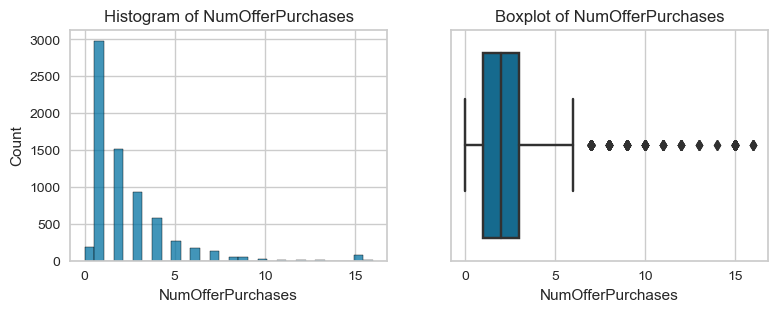

In [93]:
var = 'NumOfferPurchases'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3))
sns.histplot(ax=ax1, x=df[var], bins=30)
sns.boxplot(ax=ax2, x=df[var])
ax1.set_title(f"Histogram of {var}")
ax2.set_title(f"Boxplot of {var}")
plt.show()

In [94]:
df[df['NumOfferPurchases'] > 15].mean()

Birthyear                 1977.40
Income                   98450.25
Kid_Younger6                 0.80
Children_6to18               1.00
Recency                     41.40
MntMeat&Fish               660.20
MntEntries                  25.20
MntVegan&Vegetarian      19984.50
MntDrinks                   36.80
MntDesserts                 28.00
MntAdditionalRequests        6.82
NumOfferPurchases           16.00
NumAppPurchases              1.00
NumTakeAwayPurchases        18.80
NumStorePurchases            0.60
NumAppVisitsMonth            4.80
Complain                     0.00
Response_Cmp1                0.20
Response_Cmp2                0.20
Response_Cmp3                0.00
Response_Cmp4                0.00
Response_Cmp5                0.20
dtype: float64

Quite similar to the Vegan group (from 5 only 1 doesn't belong)

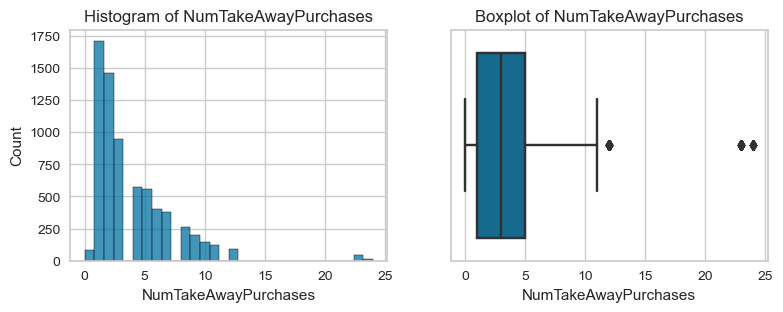

In [95]:
var = 'NumTakeAwayPurchases'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3))
sns.histplot(ax=ax1, x=df[var], bins=30)
sns.boxplot(ax=ax2, x=df[var])
ax1.set_title(f"Histogram of {var}")
ax2.set_title(f"Boxplot of {var}")
plt.show()

In [96]:
df[df['NumTakeAwayPurchases'] > 20].mean()

Birthyear                  1975.524590
Income                   143183.351230
Kid_Younger6                  0.540984
Children_6to18                0.540984
Recency                      53.721311
MntMeat&Fish                264.431148
MntEntries                   52.196721
MntVegan&Vegetarian       21621.491803
MntDrinks                    41.045902
MntDesserts                  46.727869
MntAdditionalRequests         4.647541
NumOfferPurchases            13.590164
NumAppPurchases               0.491803
NumTakeAwayPurchases         23.213115
NumStorePurchases             0.409836
NumAppVisitsMonth             0.475410
Complain                      0.032787
Response_Cmp1                 0.081967
Response_Cmp2                 0.049180
Response_Cmp3                 0.098361
Response_Cmp4                 0.065574
Response_Cmp5                 0.016393
dtype: float64

Quite similar to the Vegan group (from 61 only 8 doesn't belong)

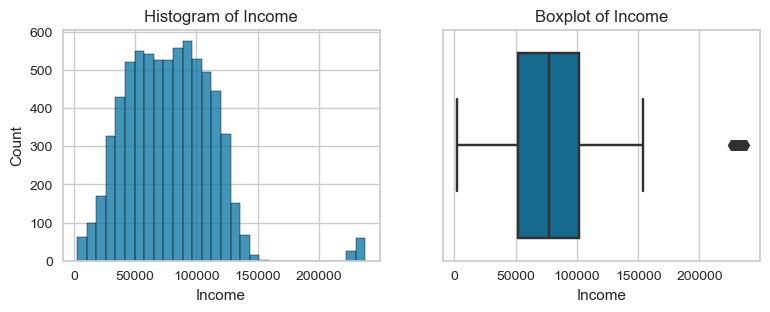

In [97]:
var = 'Income'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3))
sns.histplot(ax=ax1, x=df[var], bins=30)
sns.boxplot(ax=ax2, x=df[var])
ax1.set_title(f"Histogram of {var}")
ax2.set_title(f"Boxplot of {var}")
plt.show()

In [98]:
df[df['Income'] > 200000].mean()

Birthyear                  1974.418605
Income                   231522.184302
Kid_Younger6                  0.441860
Children_6to18                0.511628
Recency                      49.476744
MntMeat&Fish                278.498837
MntEntries                   47.372093
MntVegan&Vegetarian       13669.360465
MntDrinks                    42.500000
MntDesserts                  46.123256
MntAdditionalRequests         3.898837
NumOfferPurchases             5.453488
NumAppPurchases               0.488372
NumTakeAwayPurchases         10.058140
NumStorePurchases             0.418605
NumAppVisitsMonth             0.534884
Complain                      0.023256
Response_Cmp1                 0.034884
Response_Cmp2                 0.069767
Response_Cmp3                 0.104651
Response_Cmp4                 0.046512
Response_Cmp5                 0.034884
dtype: float64

86 customers who have an income above 200k

Conclusions:

- NumAppVisitsMonth (64) - Group of people who only buy with discount and check app regularly  - maybe study some marketing efforts to cater to this ppl
- MntVegan&Vegetarian (64)- Seems to be a group of customers who are vegan, vegetarian and pescatarian (seem to mainly use takeaway services)
- NumOfferPurchases (5)- Quite similar to the Vegan group (from 5 only 1 doesn't belong)
- NumTakeAwayPurchases (61) - Quite similar to the Vegan group (from 61 only 8 doesn't belong)
- Income (86) - Income above 200k


## 2.2 Missing Values

In [99]:
df.isnull().sum()

Name                      0
Birthyear                 0
Education                14
Marital_Status            0
Income                    0
Kid_Younger6              0
Children_6to18            0
Date_Adherence            0
Recency                  23
MntMeat&Fish              0
MntEntries                0
MntVegan&Vegetarian       0
MntDrinks                28
MntDesserts               0
MntAdditionalRequests     0
NumOfferPurchases         0
NumAppPurchases           0
NumTakeAwayPurchases      0
NumStorePurchases         0
NumAppVisitsMonth         0
Complain                  0
Response_Cmp1             0
Response_Cmp2             0
Response_Cmp3             0
Response_Cmp4             0
Response_Cmp5             0
dtype: int64

In [100]:
df[df.Education.isna()] # seem to be  Missing completely at random (MCAR) since neither itself nor other vars predict whether a value will be missing.
df.Education.fillna(df.Education.mode()[0], inplace=True)

In [101]:
df[df.Recency.isna()] # most probable (MCAR) since it's essential a time delta between the date of calculation and date of last purchase
df.Recency.fillna(df.Recency.median(), inplace=True)

In [102]:
df[df.MntDrinks.isna()] # seem to be  Missing completely at random (MCAR) since neither itself nor other vars predict whether a value will be missing.

Name  Birthyear   Education Marital_Status  \
CustomerID                                                                 
28502             Mr. Luke Chapman       1965         PhD        Married   
14468             Mr. Joe Paterson       1979  HighSchool        Married   
23660          Mr. William Skinner       1977  Graduation       Divorced   
18182           Mrs. Maria Burgess       1983  Graduation        Married   
18440             Mr. Matt Lambert       1997  Graduation       Together   
24692          Mr. Steven McDonald       1973         PhD       Together   
33542            Mr. Kevin Langdon       1960         PhD       Together   
14663          Mr. Jason Underwood       1986  HighSchool        Married   
27017          Miss Irene Metcalfe       1993  Graduation         Single   
22052          Miss Rebecca Wilson       1990      Master         Single   
12989             Mr. Connor Alsop       1971  Graduation       Together   
27689              Miss Sonia Ince       1956      Master         Single   
21746        Mrs. Michelle Thomson       1972  Graduation        Married   
10031           Mr. John Sanderson       1996         PhD       Together   
16919            Mr. Jason Russell       1986  Graduation        Married   
17876            Mr. Frank Wilkins       1983         PhD        Married   
20564             Mr. Owen Simpson       1965  Graduation       Together   
28178       Mr. Nicholas Mackenzie       1962         PhD        Married   
5117             Mr. Trevor Davies       1958      Master       Together   
29396            Mr. Eric Ferguson       1993  Graduation       Together   
26216              Mr. Keith Mills       1967  Graduation         Single   
21245            Mr. Matt Lawrence       1970         PhD         Single   
12368                Miss Joan May       1958         PhD       Together   
10142           Miss Leah Johnston       1987      Master         Single   
5444             Mr. Michael James       1960  Graduation       Divorced   
10736                 Mr. Joe Dowd       1961  HighSchool         Single   
28316        Mr. William MacDonald       1992  Graduation        Married   
17252          Mr. Julian Hamilton       1979  Graduation       Together   

              Income  Kid_Younger6  Children_6to18       Date_Adherence  \
CustomerID                                                                
28502       101869.0             0               1  2021-10-25 00:00:00   
14468       120649.0             0               0  2022-02-10 00:00:00   
23660        43947.0             1               1  2020-08-21 00:00:00   
18182        46582.0             1               0  2022-04-05 00:00:00   
18440       110697.0             0               0  2021-06-29 00:00:00   
24692       114578.0             0               0  2020-08-05 00:00:00   
33542       100227.0             0               1  2020-11-20 00:00:00   
14663        85875.0             0               1  2021-11-17 00:00:00   
27017        37151.0             1               0  2021-03-02 00:00:00   
22052       118174.0             0               0  2020-10-15 00:00:00   
12989        97951.0             0               0  2021-09-03 00:00:00   
27689        80442.0             0               0  2021-09-14 00:00:00   
21746       116784.0             0               1  2022-05-03 00:00:00   
10031       110126.0             0               0  2021-11-16 00:00:00   
16919        51417.0             1               0  2021-04-10 00:00:00   
17876        71756.0             1               1  2021-10-19 00:00:00   
20564        85006.0             0               1  2021-05-03 00:00:00   
28178        72388.0             0               1  2022-05-23 00:00:00   
5117         63797.0             1               1  2022-04-21 00:00:00   
29396        42699.0             1               0  2021-01-24 00:00:00   
26216        80789.0             1               1  2022-05-27 00:00:00   
21245        60449.0    

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer

df_knn = df[['MntDrinks', 'MntEntries', 'MntVegan&Vegetarian', 'MntDesserts']].copy()  # Used these 3 vars bcs higher corr with target var (0.7)

# Define the parameter grid to search over
param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}

# Define the imputer model
imputer = KNNImputer()

# Define the grid search object with 5-fold cross-validation
grid_search = GridSearchCV(imputer, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search object to the data
grid_search.fit(df_knn)
grid_search
print("Best parameters: ", grid_search.best_params_)
print("Best negative mean squared error: ", grid_search.best_score_)

#NEEDS TO BE STUDIED

Best parameters:  {'n_neighbors': 1}
Best negative mean squared error:  nan


In [104]:
imputer = KNNImputer(n_neighbors=1)
array_impute = imputer.fit_transform(df_knn) 
df_knn = pd.DataFrame(array_impute, columns=df_knn.columns, index=df_knn.index)
df.MntDrinks = df_knn.MntDrinks

In [105]:
df.isnull().sum()

Name                     0
Birthyear                0
Education                0
Marital_Status           0
Income                   0
Kid_Younger6             0
Children_6to18           0
Date_Adherence           0
Recency                  0
MntMeat&Fish             0
MntEntries               0
MntVegan&Vegetarian      0
MntDrinks                0
MntDesserts              0
MntAdditionalRequests    0
NumOfferPurchases        0
NumAppPurchases          0
NumTakeAwayPurchases     0
NumStorePurchases        0
NumAppVisitsMonth        0
Complain                 0
Response_Cmp1            0
Response_Cmp2            0
Response_Cmp3            0
Response_Cmp4            0
Response_Cmp5            0
dtype: int64

- Education - Filled with mode
- Recency - Since not corr with other vars (knn inputer not the best), filled with median (mean rounded would be the same value) 
- MntDrinks - Knn inputter ['MntDrinks', 'MntEntries', 'MntVegan&Vegetarian', 'MntDesserts'] - most correlated vars (0.7)            

# 3. Data Transformation

##### Gender column creation

In [106]:
df['Gender'] = np.where(df['Name'].str.contains('Mr.'), 'M', 'F')

##### Age column creation

In [107]:
demo['Age'] = datetime.now().year - demo.Birthyear

#### Antiquity & Lenght  column Creation 
(days since customer adhere to company card)

In [108]:
df[df.Date_Adherence.apply(lambda x: isinstance(x, str))]                                         #16 cases of string 2/29/2022
df.loc[df.Date_Adherence.apply(lambda x: isinstance(x, str)), 'Date_Adherence'] = '3/01/2022'     # Converted to 3/01/2022 and to datetime object
df['Date_Adherence'] = pd.to_datetime(df['Date_Adherence'])
df['Antiquity'] = (datetime.today() - df['Date_Adherence']).dt.days
df['Length'] = df['Antiquity'] - df.Recency

#### Total Spent Creation - Mnt_total

In [109]:
df['Mnt_Total'] = df[['MntMeat&Fish', 'MntEntries', 'MntVegan&Vegetarian', 'MntDrinks', 'MntDesserts','MntAdditionalRequests']].sum(axis=1)

#### Frequency Creation - Freq
(number of purchases multichannel)

In [110]:
df['Freq'] = df[['NumAppPurchases', 'NumTakeAwayPurchases', 'NumStorePurchases', 'NumOfferPurchases']].sum(axis=1)
df.loc[(df.Freq == 0) & (df.Mnt_Total <20000), 'Freq'] = 1
df.drop(df[df.Freq == 0].index, inplace=True)

Incongruence - 26 customers with money spent but with 0 purchases registered
- 24 low amounts - could be an error in regestering so we set freq to 1
- 2 with amounts above 20k higly inprobable to be spent in one single purchase so we dropped 

####  Avg_Ticket creation

In [111]:
df['Avg_Ticket']= df.Mnt_Total / df.Freq

#### Education Binning (2 bins)

In [112]:
df.Education = df.Education.str.title() 
df['Education_bins_2'] = df.Education.replace({
    'Phd': 'High',
    'Master' : 'High',
    'Graduation': 'Low',
    'Basic' : 'Low',
    'Highschool' : 'Low'
})

#### Education Binning (3 bins)

In [113]:
df.Education = df.Education.str.title() 
df['Education_bins_3'] = df.Education.replace({
    'Phd': 'High',
    'Master' : 'High',
    'Graduation': 'Medium',
    'Basic' : 'Low',
    'Highschool' : 'Medium'
})

#### Marital Status (2 bins)

In [114]:
df.Marital_Status = df.Marital_Status.str.title()
df['Marital_Status_2'] = df.Marital_Status.replace({
    'Married' : 'Together',
    'Single' : 'Single',
    'Divorced' : 'Single',
    'Widow' : 'Single'
})

#### Marital Status (4 bins)

In [115]:
df['Marital_Status_4'] = df.Marital_Status.replace('Married','Together')

#### Income (3bins)

In [116]:
df['Income_bins'] = pd.qcut(df['Income'], q=3, labels=['Low', 'Medium', 'High'])
df.groupby('Income_bins').Income.describe()

count           mean           std      min       25%       50%  \
Income_bins                                                                     
Low          2333.0   40764.128590  13247.587040   2493.8   32414.0   42782.0   
Medium       2332.0   77048.309605   9735.773259  59940.0   68690.5   77183.0   
High         2333.0  116025.349850  25279.434113  93646.0  101999.0  110767.0   

                  75%         max  
Income_bins                        
Low           51548.0   59903.000  
Medium        85591.5   93634.000  
High         121205.0  237639.725

- The third bin(High) has a large range but we decided to keep the income outliers since we are not interested in descriminating between ppl who earn around 93k and 237k and it doesn't affect the model

#### Have_kids

In [117]:
df['Have_kids'] = (df['Kid_Younger6'] + df['Children_6to18']).apply(lambda x: 1 if x > 0 else 0)

#### Food Types %

In [118]:
vars = ['MntMeat&Fish', 'MntDrinks', 'MntEntries', 'MntVegan&Vegetarian', 'MntDesserts', 'MntAdditionalRequests']
for var in vars:
    df[var+'%']= (df[var]/df.Mnt_Total)*100

#### Channel %

In [119]:
df['Freq_channel'] = df.Freq - df.NumOfferPurchases
df.loc[(df.NumOfferPurchases > 0) & (df.Freq == 0)].shape

vars = ['NumAppPurchases', 'NumTakeAwayPurchases', 'NumStorePurchases']
for var in vars:
    df[var+'%']= (df[var]/df.Freq_channel)*100

df.drop(df[df.Freq_channel == 0].index, inplace=True)

- Used Freq calculated without NumOfferPurchases because we only cared about the channel
- 12 customers dropped because seem to be costumers who only buy whit offers ( don't have any purchase trough a normal channel)

## Analyze new Vars

In [120]:
new = df[['Antiquity', 'Length', 'Freq', 'Mnt_Total', 'Avg_Ticket',
       'MntMeat&Fish%', 'MntDrinks%',
       'MntEntries%', 'MntVegan&Vegetarian%', 'MntDesserts%',
       'MntAdditionalRequests%', 'NumAppPurchases%', 'NumTakeAwayPurchases%',
       'NumStorePurchases%', 'Freq_channel']].copy()

new

Antiquity  Length  Freq  Mnt_Total   Avg_Ticket  MntMeat&Fish%  \
CustomerID                                                                   
14594             826   783.0    26    16676.0   641.384615      27.824418   
19070             735   661.0    27    21486.0   795.777778      32.951689   
29888             458   373.0    18    13448.0   747.111111      30.710886   
12221             550   525.0    24     5634.0   234.750000      63.720270   
21107             855   791.0    19    17303.0   910.684211      31.150668   
...               ...     ...   ...        ...          ...            ...   
30686             493   427.0    24    15665.0   652.708333      58.027450   
17210             945   937.0    20    24246.0  1212.300000      24.210179   
29186             486   456.0    10      680.0    68.000000      79.411765   
23312             884   876.0     8      647.0    80.875000      12.364760   
15581             800   720.0    30    15269.0   508.966667      47.678302   

            MntDrinks%  MntEntries%  MntVegan&Vegetarian%  MntDesserts%  \
CustomerID                                                                
14594        13.432478    20.268650             34.180859      3.370113   
19070         8.563716    17.127432             35.464954      5.678116   
29888        27.067222     2.825699             36.362284      2.825699   
12221         1.419950     0.000000             31.416400      3.194888   
21107         3.791250     6.507542             54.874877      3.247992   
...                ...          ...                   ...           ...   
30686         1.659751     1.659751             38.397702      0.000000   
17210        15.672688     4.206879             55.555556      0.000000   
29186         0.000000     0.000000             19.852941      0.000000   
23312        18.547141    18.547141             32.457496     15.455951   
15581        24.625057     2.763770             11.081276     12.312529   

            MntAdditionalRequests%  NumAppPurchases%  NumTakeAwayPurchases%  \
CustomerID                                                                    
14594                     0.923483         41.666667              29.166667   
19070                     0.214093         19.230769              34.615385   
29888                     0.208209         29.411765              29.411765   
12221                     0.248491         42.105263              15.789474   
21107                     0.427672         21.052632              36.842105   
...                            ...               ...                    ...   
30686                     0.255346         26.086957              26.086957   
17210                     0.354698         26.315789              36.842105   
29186                     0.735294         37.500000              12.500000   
23312                     2.627512         42.857143              14.285714   
15581                     1.539066         20.689655              41.379310   

            NumStorePurchases%  Freq_channel  
CustomerID                                    
14594                29.166667            24  
19070                46.153846            26  
29888                41.176471            17  
12221                42.105263            19  
21107                42.105263            19  
...                        ...           ...  
30686                47.826087            23  
17210                36.842105            19  
29186                50.000000             8  
23312                42.857143             7  
15581                37.931034            29  

[6986 rows x 15 columns]

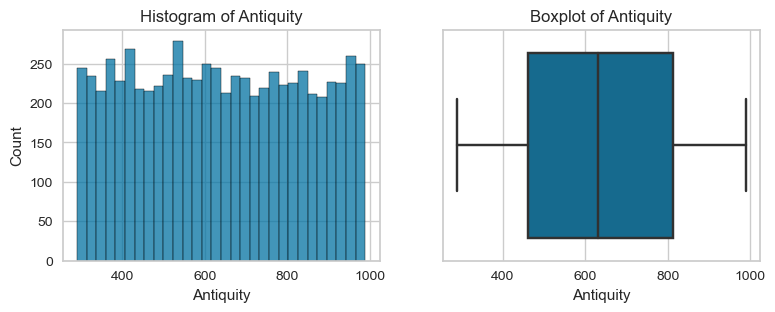

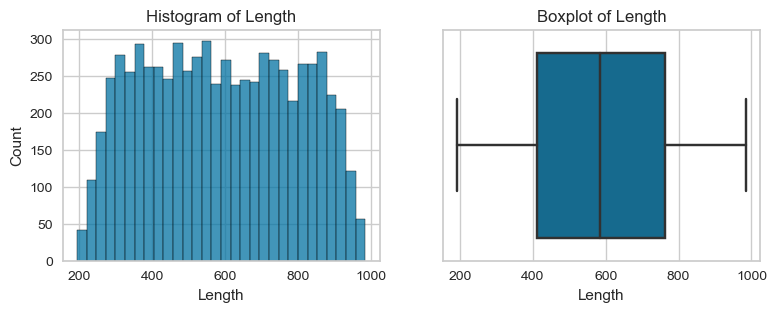

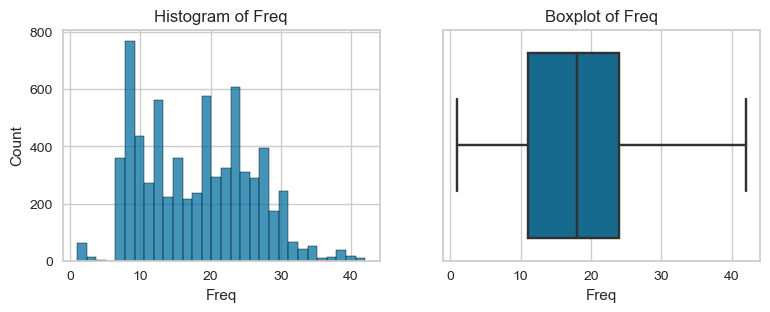

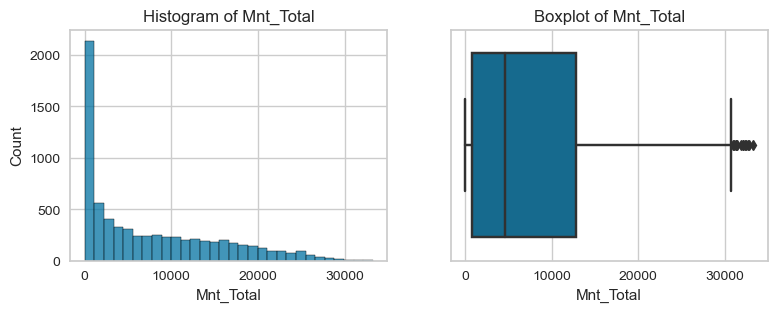

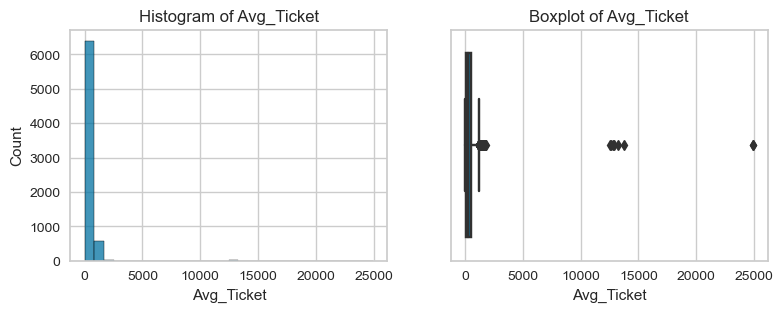

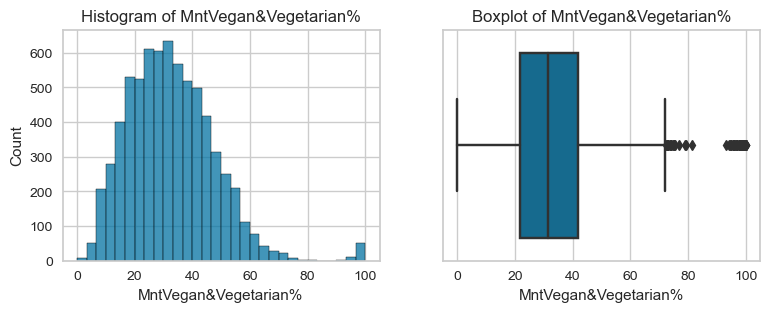

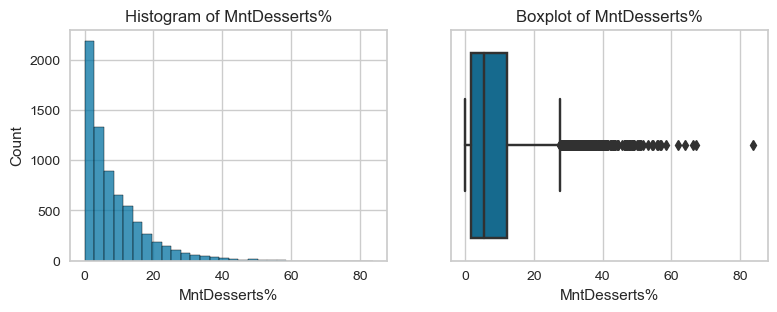

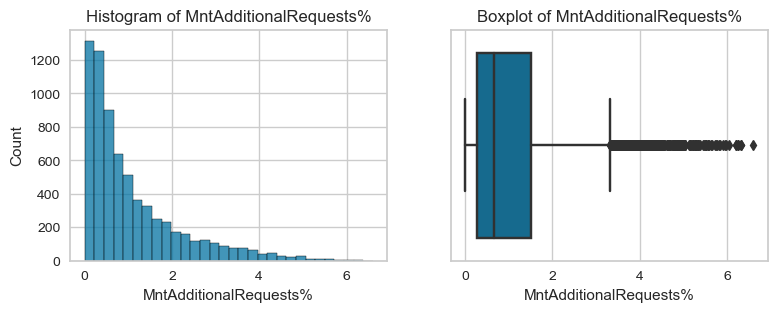

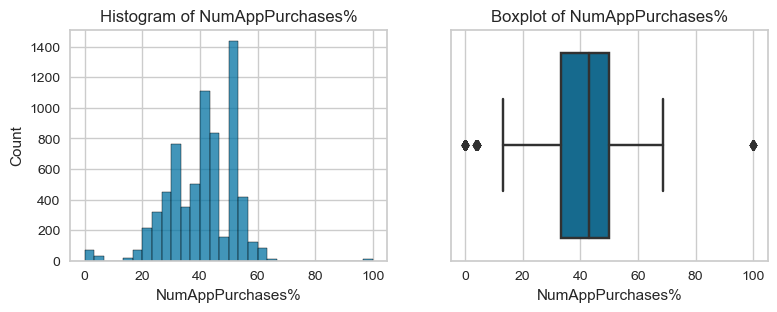

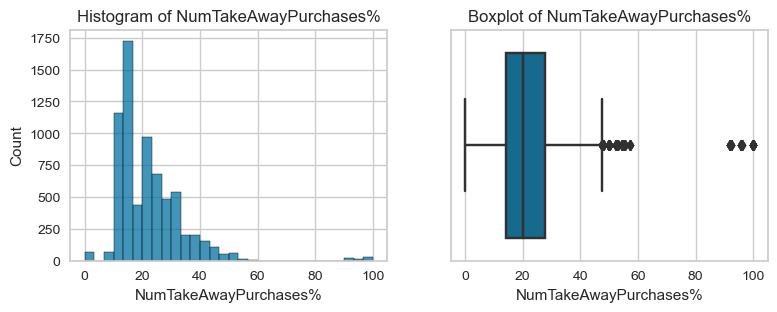

In [121]:
for var in new:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3))
    sns.histplot(ax=ax1, x=new[var], bins=30)
    sns.boxplot(ax=ax2, x=new[var])
    ax1.set_title(f"Histogram of {var}")
    ax2.set_title(f"Boxplot of {var}")
    plt.show()

In [122]:
new.describe()

Antiquity       Length         Freq     Mnt_Total    Avg_Ticket  \
count  6986.000000  6986.000000  6986.000000   6986.000000   6986.000000   
mean    637.316633   588.110936    18.103206   7536.887589    357.794790   
std     202.765708   204.499887     7.849338   7645.935903    639.977781   
min     290.000000   193.000000     1.000000     18.600000      1.200000   
25%     462.000000   412.000000    11.000000    820.500000     78.446970   
50%     631.500000   584.000000    18.000000   4672.000000    236.980000   
75%     813.000000   762.000000    24.000000  12782.250000    528.661765   
max     989.000000   984.000000    42.000000  33256.000000  24942.000000   

       MntMeat&Fish%   MntDrinks%  MntEntries%  MntVegan&Vegetarian%  \
count    6986.000000  6986.000000  6986.000000           6986.000000   
mean       41.115914     8.449521     8.369903             32.707457   
std        23.237809     9.256550     9.083098             14.965728   
min         0.000000     0.000000     0.000000              0.000000   
25%        23.167598     1.643907     1.677237             21.740091   
50%        39.151267     5.623250     5.555380             31.550148   
75%        58.170831    12.169210    11.840503             41.913432   
max        98.461169    68.571429    73.800738             99.967528   

       MntDesserts%  MntAdditionalRequests%  NumAppPurchases%  \
count   6986.000000             6986.000000       6986.000000   
mean       8.275914                1.081290         40.697506   
std        8.954206                1.112653         11.172578   
min        0.000000                0.000000          0.000000   
25%        1.650229                0.281369         33.333333   
50%        5.483628                0.668788         42.857143   
75%       12.048193                1.498929         50.000000   
max       83.818393                6.604747        100.000000   

       NumTakeAwayPurchases%  NumStorePurchases%  Freq_channel  
count            6986.000000         6986.000000   6986.000000  
mean               22.199318           36.759631     15.675637  
std                11.879157            9.947395      7.276943  
min                 0.000000            0.000000      1.000000  
25%                14.285714           31.578947      9.000000  
50%                20.000000           37.500000     16.000000  
75%                27.586207           42.857143     22.000000  
max               100.000000          100.000000     36.000000

## Incongruences

In [123]:
# df.loc[(df.Freq == 0) & (df.Mnt_Total <20000), 'Freq'] = 1
# df.drop(df[df.Freq == 0].index, inplace=True)

## PCA

In [124]:
df_pca = df[[ 
    'Income',
    'Kid_Younger6', 'Children_6to18',  'Recency',
    'MntMeat&Fish', 'MntEntries', 'MntVegan&Vegetarian', 'MntDrinks',
    'MntDesserts', 'MntAdditionalRequests', 'NumOfferPurchases',
    'NumAppPurchases', 'NumTakeAwayPurchases', 'NumStorePurchases',
    'NumAppVisitsMonth', 'Complain', 'Response_Cmp1', 'Response_Cmp2',
    'Response_Cmp3', 'Response_Cmp4', 'Response_Cmp5', 'Gender',
    'Antiquity','Freq', 'Mnt_Total', 'Avg_Ticket', 'Education_bins_3', 'Marital_Status_4', ]].copy()

# Converting to Numeric
df_pca['Gender']= df_pca['Gender'].replace('M',1).replace('F',0)
df_pca['Education_bins_3'] = df_pca['Education_bins_3'].replace({'Low':0, 'Medium':1, 'High':2 })
dummies = pd.get_dummies(df['Marital_Status_4'], prefix='Marital_Status')
df_pca = pd.concat([df_pca, dummies], axis=1)
df_pca.drop('Marital_Status_4', axis=1, inplace=True)

#Scaling
df_pca_scaled = df_pca.copy()
scaler = MinMaxScaler()
df_pca_scaled = scaler.fit_transform(df_pca)
cols = df_pca.columns
df_pca_scaled = pd.DataFrame(df_pca_scaled, columns=cols, index=df_pca.index)

#Check Number of components
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_pca_scaled)
x_pca = pca.transform(df_pca_scaled)


In [125]:
# % of Explained Variance per component
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=range(1,32))
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('% of Explained Variance per component')
plt.xticks(rotation=90)
plt.show()

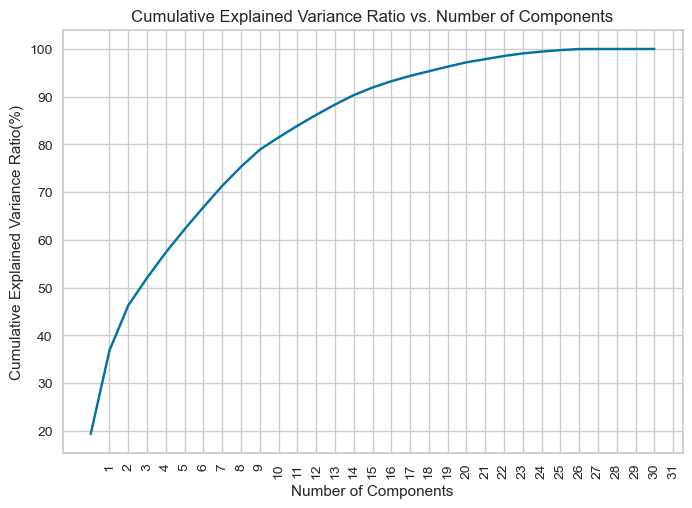

In [126]:
# Plot cumulative explained variance
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)*100
plt.plot(cumulative_var_ratio, )
plt.xlabel('Number of Components', )
plt.ylabel('Cumulative Explained Variance Ratio(%)')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.xticks( ticks=range(1,32),rotation=90)
plt.grid(True)
plt.show()

- The first graph shows that the components that explain most of the variance it's the first 3, the components after the third have a noticable drop and the ones after the  tenth have an even more accentuated drop.

- The second graph that with 3 components only 50% of the variance of the original data is explained, and ten explain around 80%.

- As a first aproach, and acknowledging the limitatations of the analysis, we used 3 components to make it easier to vizualize and make sense of the results.

In [127]:
#Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principal_components = pca.fit(df_pca_scaled)
X_pca = pca.transform(df_pca_scaled)


In [128]:
#3 Variables with most impact in PC0
loading_scores_0 = pd.Series(pca.components_[0], index=df_pca_scaled.columns)
loading_scores_0.sort_values(ascending=False, inplace=True)
print(loading_scores_0.head(3))
print(loading_scores_0.tail(3))


#loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3'], index=df_pca_scaled.columns) - All loadings


Marital_Status_Single      0.612891
Marital_Status_Divorced    0.094680
Kid_Younger6               0.034655
dtype: float64
MntMeat&Fish              -0.036968
Gender                    -0.252321
Marital_Status_Together   -0.736039
dtype: float64


In [129]:
#3 Variables with most impact in PC1
loading_scores_1 = pd.Series(pca.components_[1], index=df_pca_scaled.columns)
loading_scores_1.sort_values(ascending=False, inplace=True)
print(loading_scores_1.head(3))
print(loading_scores_1.tail(3))

Mnt_Total            0.370777
NumStorePurchases    0.336057
MntMeat&Fish         0.324755
dtype: float64
Marital_Status_Together   -0.079155
NumAppVisitsMonth         -0.119154
Kid_Younger6              -0.300430
dtype: float64


In [130]:
#3 Variables with most impact in PC2
loading_scores_2 = pd.Series(pca.components_[2], index=df_pca_scaled.columns)
loading_scores_2.sort_values(ascending=False, inplace=True)
print(loading_scores_2.head(3))
print(loading_scores_2.tail(3))

Gender                     0.795702
Marital_Status_Divorced    0.432141
Marital_Status_Widow       0.100126
dtype: float64
Response_Cmp3             -0.031306
Marital_Status_Single     -0.173202
Marital_Status_Together   -0.359065
dtype: float64


In [131]:
# Visualizing the Components
plt.figure(figsize =(7, 5))
plt.scatter(x_pca[:, 0], x_pca[:, 1])
plt.xlabel('PC0')
plt.ylabel('PC1')

Text(0, 0.5, 'PC1')

In [132]:
# Visualizing the Components
plt.figure(figsize =(7, 5))
plt.scatter(x_pca[:, 0], x_pca[:, 2])
plt.xlabel('PC0')
plt.ylabel('PC2')

Text(0, 0.5, 'PC2')

Text(0, 0.5, 'PC2')

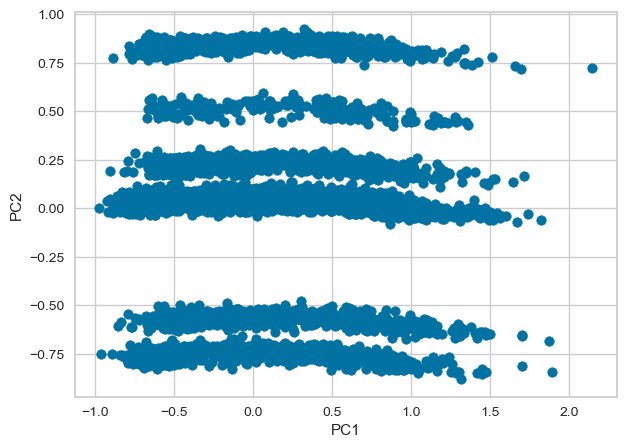

In [133]:
# Visualizing the Components
plt.figure(figsize =(7, 5))
plt.scatter(x_pca[:, 1], x_pca[:, 2])
plt.xlabel('PC1')
plt.ylabel('PC2')

In [134]:
#Create df with Components
column_names = ['PC1', 'PC2', 'PC3']  
df_pcs = pd.DataFrame(X_pca, columns=column_names, index=df_pca_scaled.index)

#fundamentar melhor com caracteristicas do dbscan
- Because of the elipse shape and distance between data clusters we decided to use dbscan 

In [135]:
#Applying DBSCAN 
from sklearn.cluster import DBSCAN
df_pcs_db = df_pcs.copy()
clustering = DBSCAN(eps=0.2, min_samples=4).fit(df_pcs)
df_pcs_db['DBSACN'] = clustering.labels_ 

In [136]:
#Visualizing clustering results
sns.scatterplot(x=df_pcs_db.PC1, y=df_pcs_db.PC2,hue=df_pcs_db.DBSACN)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

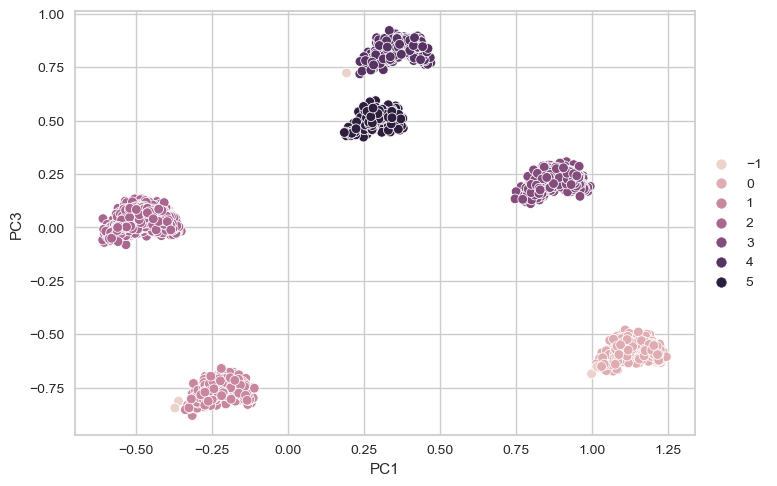

In [137]:
#Visualizing clustering results
sns.scatterplot(x=df_pcs_db.PC1, y=df_pcs_db.PC3,hue=df_pcs_db.DBSACN)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [138]:
#Visualizing clustering results
sns.scatterplot(x=df_pcs_db.PC2, y=df_pcs_db.PC3,hue=df_pcs_db.DBSACN)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

- Dbsacn found some outliers but overall returned 6 very well defined clusters, as expected since it's density based

DBSACN
-1    29995.833333
 0     7271.472174
 1     7804.045207
 2     7442.674716
 3     7186.558719
 4     7679.216693
 5     9182.618776
Name: Mnt_Total, dtype: float64


<AxesSubplot:xlabel='Recency', ylabel='Freq'>

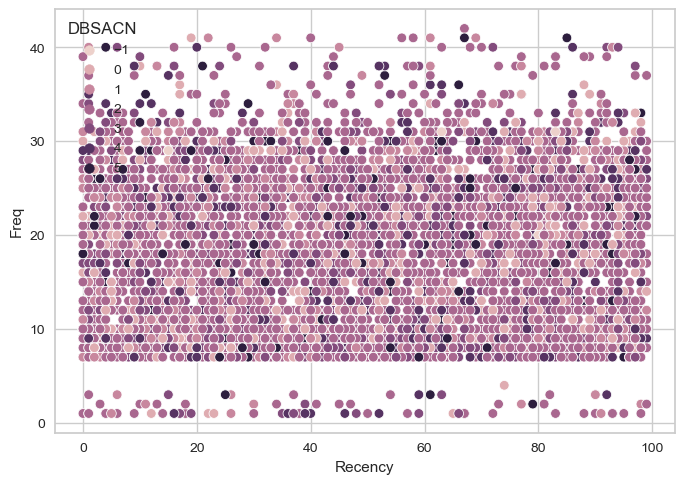

In [139]:
# Trying to interpret clusters based on Pca components 
df_try = df.copy()
df_try['DBSACN'] = df_pcs_db['DBSACN']
print(df_try.groupby('DBSACN')['Mnt_Total'].mean())
sns.scatterplot(x=df_try.Recency, y=df_try.Freq, hue=df_try.DBSACN)

- We can't interpret the original vars with clusters createad from pca components. Dbscan clusters only allow us to conclude that, given the data provided, there are 6 different groups of customers but we can't say in wich way they differentiate. 
- PCA is a dimensionality reduction technique that transforms the original variables into a new set of uncorrelated variables called principal components. The principal components are linear combinations of the original variables, so their interpretation can be different from the original variables. Therefore, it is possible that the resulting clusters based on the transformed data do not directly correspond to the original variables.
- Since our goal is to create tailored marketing campaigns and overall understand who are our costumers and their consumption habbits we have to implement another aproach

## Perspectives

### Costumer Value

In [140]:
customer_value = df[['Recency','Freq','Mnt_Total']].copy()
#customer_value.drop(customer_value[customer_value.Freq < 7].index,inplace=True)

In [141]:
# Data Correction (trying to aproach to a normal distribution)
cv_s = customer_value.copy()
cv_s = np.sqrt(cv_s)

# Scaling
scaler = MinMaxScaler()
cv_s = scaler.fit_transform(cv_s)
cols = customer_value.columns
cv_s = pd.DataFrame(cv_s, columns=cols, index=customer_value.index)

Note : Check Freq bellow 7  - extreme results that affect kmeans performance (#customer_value.drop(customer_value[customer_value.Freq < 7].index,inplace=True))

#### Defining nr of Clusters

2 0.4202886397375908
3 0.4057613961245596
4 0.39187281359394155
5 0.3680983618889991


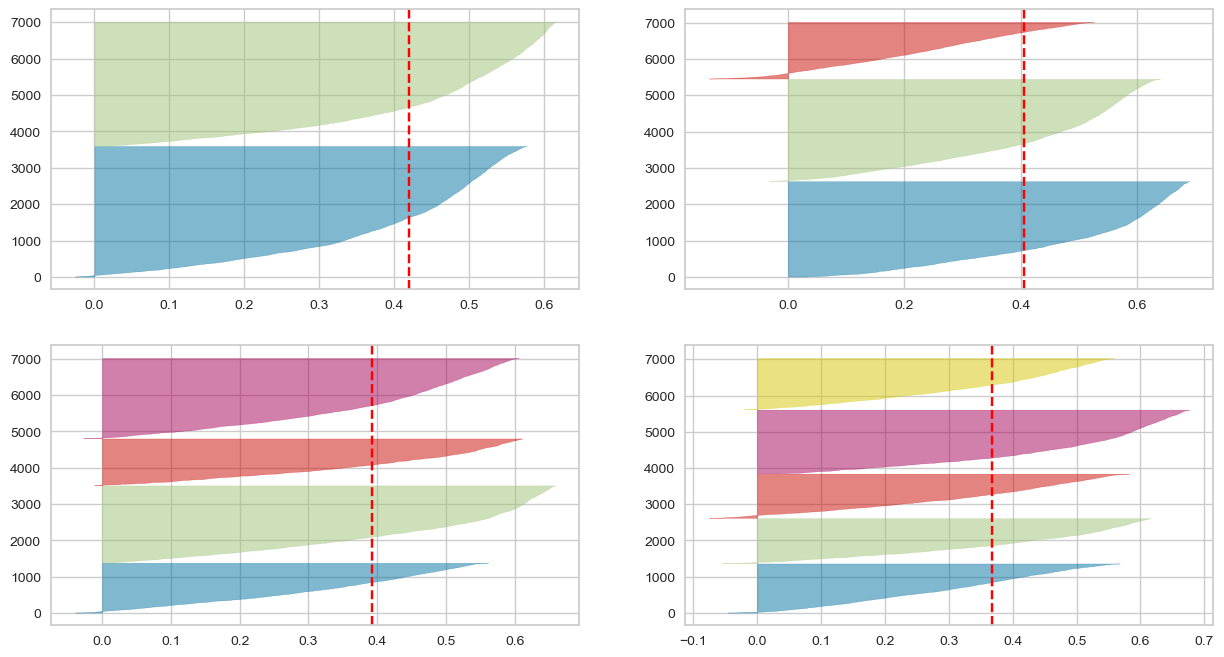

In [142]:
!pip install yellowbrick

from yellowbrick.cluster import SilhouetteVisualizer
#a =  cv_s['Length'].values.reshape(-1, 1)
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', random_state=100)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(cv_s)
    print(i, visualizer.silhouette_score_ )

In [143]:
ks = range(1, 11)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k).fit(cv_s)
    inertias.append(model.inertia_)

plt.plot(ks, inertias)
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [144]:
# from scipy.cluster import hierarchy

# df_prod_sample = cv_s.sample(n = 1000, random_state = 100)
# clusters = hierarchy.linkage(cv_s, method="ward")
# plt.figure(figsize=(8, 6))
# dendrogram = hierarchy.dendrogram(clusters)

- Silhouette:  Similar silhouette scores and all clusters are above it
- Elbow: Possible nr (2,3,4)
- Hierarchical : Show a small distance between 3 and 4
- Conclusion: Will try the tree options to see wich will fit better with our business goal and analysis

#### Kmeans

In [145]:
from sklearn.metrics.pairwise import euclidean_distances
cv_kmeans = cv_s.copy()
for i in range(2,6):
    model = KMeans(n_clusters=i,init='k-means++', random_state = 100).fit(cv_kmeans.iloc[:,:3])
    cv_kmeans['kmeans_'+str(i)] = model.labels_
    dists = euclidean_distances(model.cluster_centers_)
    centroids = model.cluster_centers_

In [146]:
# Viz prep
datamart_melt_2 = pd.melt(cv_kmeans.reset_index(),
id_vars=['CustomerID','kmeans_2'],
value_vars=['Freq','Mnt_Total','Recency'],
var_name='Attribute',value_name='Value')

datamart_melt_3 = pd.melt(cv_kmeans.reset_index(),
id_vars=['CustomerID','kmeans_3'],
value_vars=['Freq','Mnt_Total','Recency'],
var_name='Attribute',value_name='Value')

datamart_melt_4 = pd.melt(cv_kmeans.reset_index(),
id_vars=['CustomerID','kmeans_4'],
value_vars=['Freq','Mnt_Total','Recency'],
var_name='Attribute',value_name='Value')


ValueError: The palette list has the wrong number of colors.

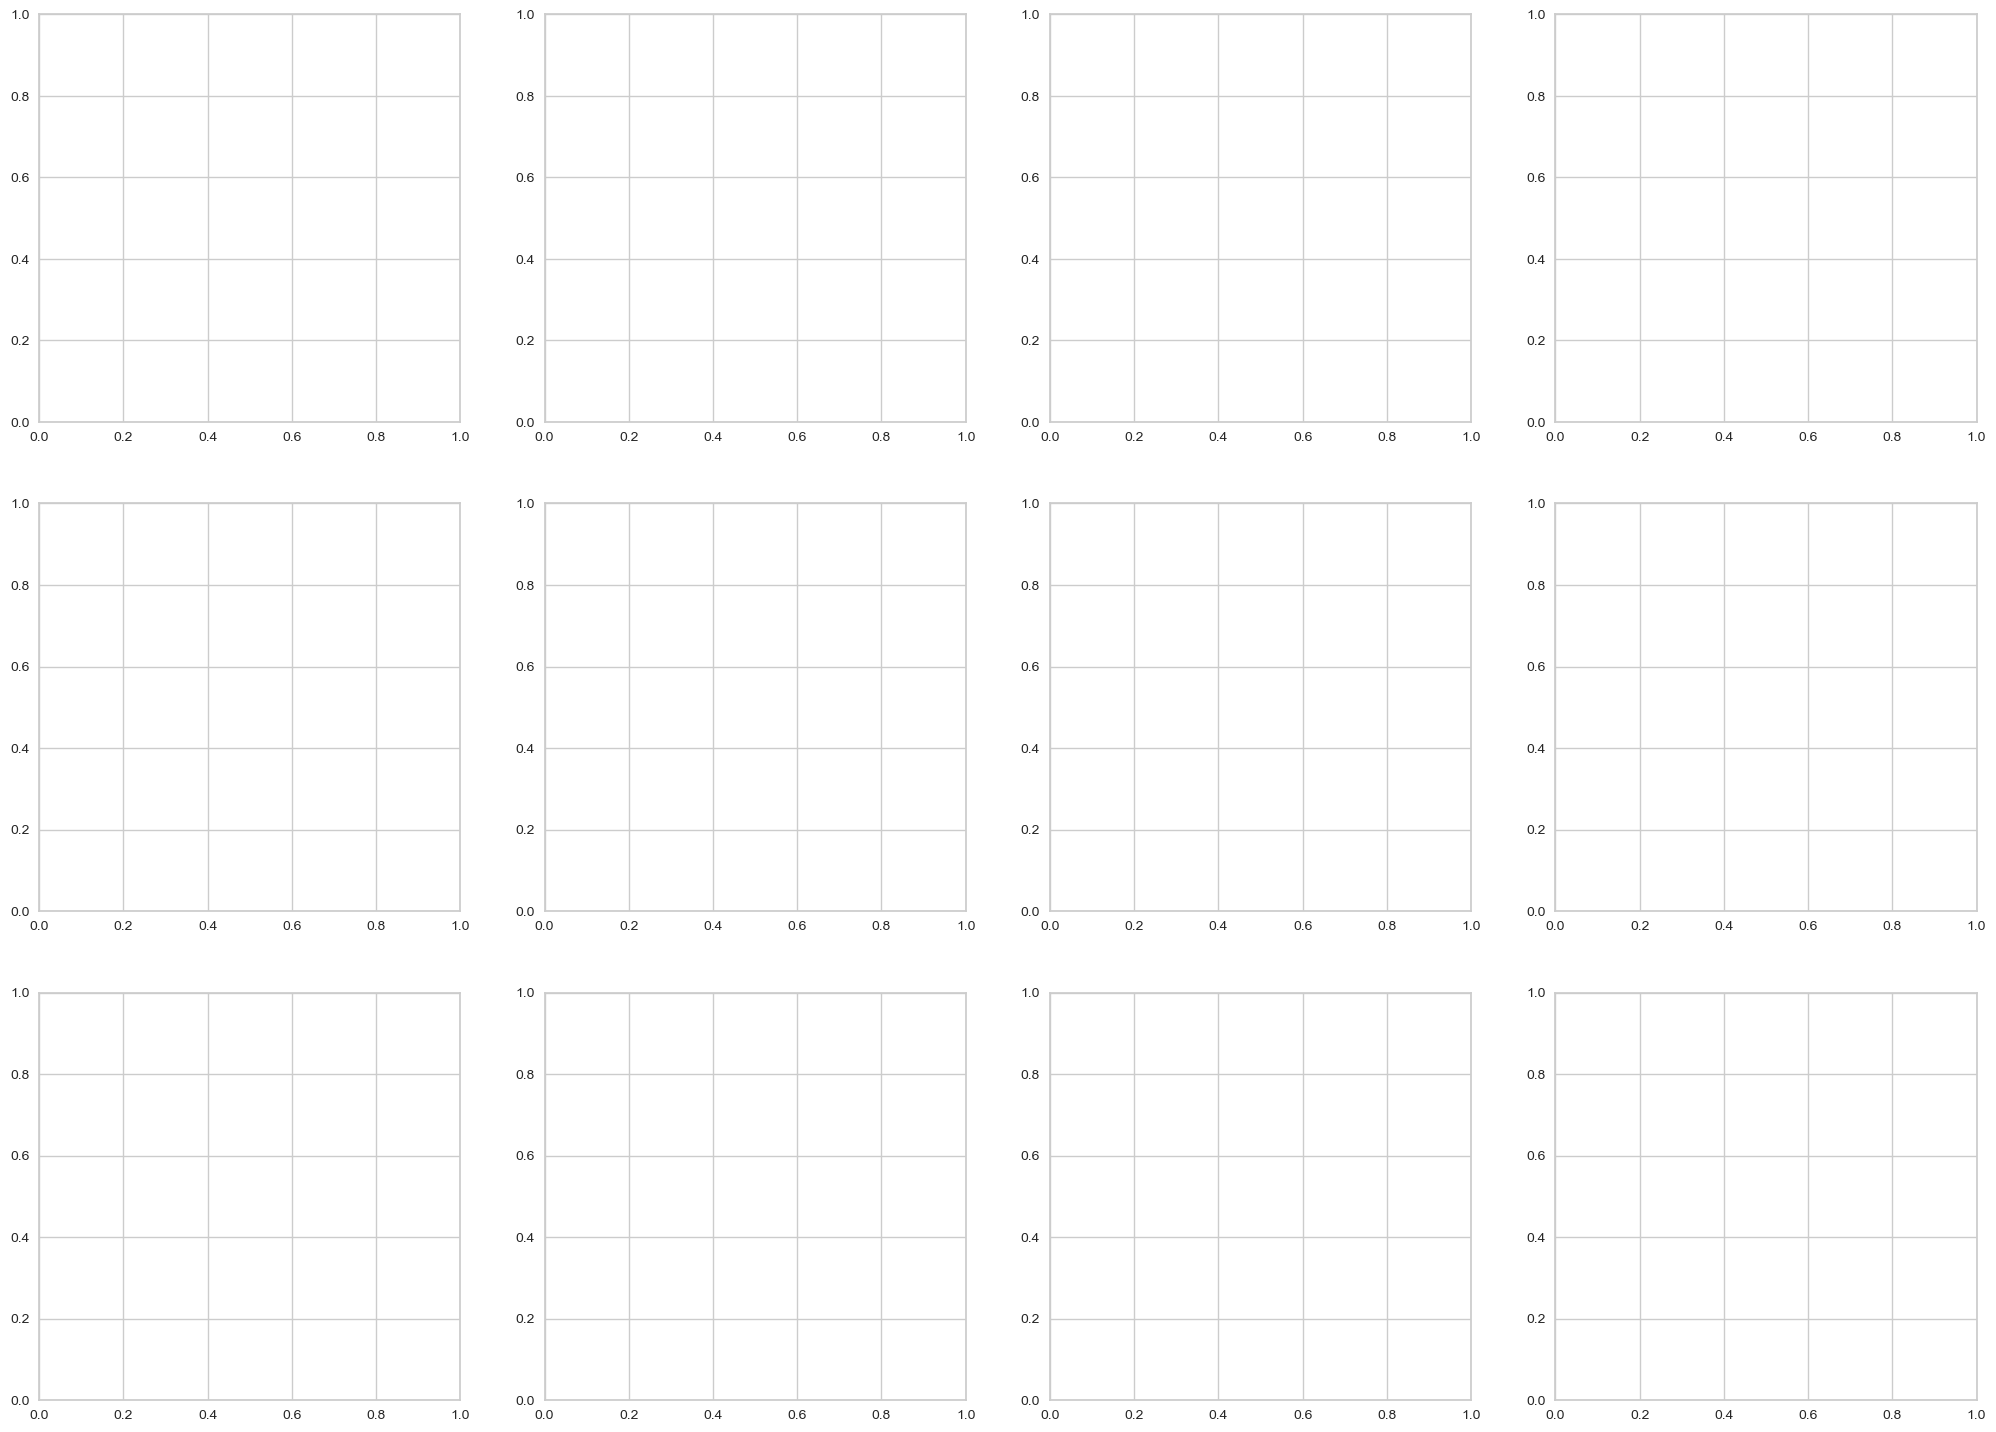

In [147]:
#Visualization
palette = sns.color_palette("deep", n_colors=len(set(cv_kmeans.kmeans_4)))

fig, ax = plt.subplots(3, 4, figsize=(25,18))

sns.scatterplot(x=df.Recency, y=df.Freq, hue=cv_kmeans.kmeans_2, palette=palette, legend=False, ax=ax[0, 0])
ax[0, 0].set_title("K=2")
sns.scatterplot(x=df.Recency, y=df.Freq, hue=cv_kmeans.kmeans_3, palette=palette, legend=False, ax=ax[1, 0])
ax[1, 0].set_title("K=3")
sns.scatterplot(x=df.Recency, y=df.Freq, hue=cv_kmeans.kmeans_4, palette=palette, legend=False, ax=ax[2, 0])
ax[2, 0].set_title("K=4")

sns.scatterplot(x=df.Recency, y=df.Mnt_Total, hue=cv_kmeans.kmeans_2, palette=palette, legend=False, ax=ax[0, 1])
ax[0, 1].set_title("K=2")
sns.scatterplot(x=df.Recency, y=df.Mnt_Total, hue=cv_kmeans.kmeans_3, palette=palette, legend=False, ax=ax[1, 1])
ax[1, 1].set_title("K=3")
sns.scatterplot(x=df.Recency, y=df.Mnt_Total, hue=cv_kmeans.kmeans_4, palette=palette, legend=False, ax=ax[2, 1])
ax[2, 1].set_title("K=4")

sns.scatterplot(x=df.Freq, y=df.Mnt_Total, hue=cv_kmeans.kmeans_2, palette=palette, legend=False, ax=ax[0, 2])
ax[0, 2].set_title("K=2")
sns.scatterplot(x=df.Freq, y=df.Mnt_Total, hue=cv_kmeans.kmeans_3, palette=palette, legend=False, ax=ax[1, 2])
ax[1, 2].set_title("K=3")
sns.scatterplot(x=df.Freq, y=df.Mnt_Total, hue=cv_kmeans.kmeans_4, palette=palette, legend=False, ax=ax[2, 2])
ax[2, 2].set_title("K=4")


sns.lineplot(x="Attribute", y="Value", hue='kmeans_2', data=datamart_melt_2, ax=ax[0, 3],palette=palette, legend=False,)
ax[0, 3].set_title("K=2")
sns.lineplot(x="Attribute", y="Value", hue='kmeans_3', data=datamart_melt_3, ax=ax[1, 3],palette=palette, legend=False,)
ax[1, 3].set_title("K=2")
sns.lineplot(x="Attribute", y="Value", hue='kmeans_4', data=datamart_melt_4, ax=ax[2, 3],palette=palette, legend=False,)
ax[2, 3].set_title("K=2")
plt.show()


In [ ]:
cluster_order = [0, 3, 2, 1]
graph = cv_kmeans[['Freq','Mnt_Total','Recency','kmeans_4']].groupby(['kmeans_4']).mean()
graph = graph.loc[cluster_order]
graph.plot.bar(figsize=(10,6), rot=0)

In [ ]:
# CLusters Sizes
print(cv_kmeans.kmeans_2.value_counts().sort_index(ascending=True))
print(cv_kmeans.kmeans_3.value_counts().sort_index(ascending=True))
print(cv_kmeans.kmeans_4.value_counts().sort_index(ascending=True))

Conclusions:
- 2 Clusters:
    - Discriminates between Frequency and Total Spent but not Recency
- 3 Clusters:
    - 1 cluster with low frequency, low total spent and medium Recency
    - 2 clusters with high frequency, high total spent but one with high recency and the other with lower (even more than the 1st cluster)
    - Enable us to target high spending frequent customers that might be churning
- 4 Clusters:
    - 2 clusters with high frequency and total spent but one with high recency and the other with lower
    - 2 clusters with low frequency, low total spent but one with high recency and the other with lower
    - Enable us to target high and low spending frequent customers that might be churning (can alocate different amount of resources to the two groups depending of their contribution for the total revenue of the restaurant)

<br>**Important Note**: There are some customers that are not clustered correctly, probably because there are some extreme values in frequency and amount spent and kmeans it's sensible to them. In the FreqxAmnt_Total we can see four groups outside the main data "cloud" with extreme values in both variables.

#### Kmedoids

In [ ]:
from sklearn_extra.cluster import KMedoids
cv_kmedoids = cv_s.copy()
for i in range(2,5):
    model = KMedoids(n_clusters=i, random_state = 100,init='k-medoids++', method='pam').fit(cv_kmedoids)
    cv_kmedoids['kmedoids_'+str(i)] = model.labels_
    dists = euclidean_distances(model.cluster_centers_)
    medoids = model.medoid_indices_
    print(medoids)

In [ ]:
# Viz prep
datamart_melt_2 = pd.melt(cv_kmedoids.reset_index(),
id_vars=['CustomerID','kmedoids_2'],
value_vars=['Freq','Mnt_Total','Recency'],
var_name='Attribute',value_name='Value')

datamart_melt_3 = pd.melt(cv_kmedoids.reset_index(),
id_vars=['CustomerID','kmedoids_3'],
value_vars=['Freq','Mnt_Total','Recency'],
var_name='Attribute',value_name='Value')

datamart_melt_4 = pd.melt(cv_kmedoids.reset_index(),
id_vars=['CustomerID','kmedoids_4'],
value_vars=['Freq','Mnt_Total','Recency'],
var_name='Attribute',value_name='Value')


In [ ]:
#Visualization
palette = sns.color_palette("deep", n_colors=len(set(cv_kmedoids.kmedoids_4)))

fig, ax = plt.subplots(3, 4, figsize=(25,18))

sns.scatterplot(x=df.Recency, y=df.Freq, hue=cv_kmedoids.kmedoids_2, palette=palette, legend=False, ax=ax[0, 0])
ax[0, 0].set_title("K=2")
sns.scatterplot(x=df.Recency, y=df.Freq, hue=cv_kmedoids.kmedoids_3, palette=palette, legend=False, ax=ax[1, 0])
ax[1, 0].set_title("K=3")
sns.scatterplot(x=df.Recency, y=df.Freq, hue=cv_kmedoids.kmedoids_4, palette=palette, legend=False, ax=ax[2, 0])
ax[2, 0].set_title("K=4")

sns.scatterplot(x=df.Recency, y=df.Mnt_Total, hue=cv_kmedoids.kmedoids_2, palette=palette, legend=False, ax=ax[0, 1])
ax[0, 1].set_title("K=2")
sns.scatterplot(x=df.Recency, y=df.Mnt_Total, hue=cv_kmedoids.kmedoids_3, palette=palette, legend=False, ax=ax[1, 1])
ax[1, 1].set_title("K=3")
sns.scatterplot(x=df.Recency, y=df.Mnt_Total, hue=cv_kmedoids.kmedoids_4, palette=palette, legend=False, ax=ax[2, 1])
ax[2, 1].set_title("K=4")

sns.scatterplot(x=df.Freq, y=df.Mnt_Total, hue=cv_kmedoids.kmedoids_2, palette=palette, legend=False, ax=ax[0, 2])
ax[0, 2].set_title("K=2")
sns.scatterplot(x=df.Freq, y=df.Mnt_Total, hue=cv_kmedoids.kmedoids_3, palette=palette, legend=False, ax=ax[1, 2])
ax[1, 2].set_title("K=3")
sns.scatterplot(x=df.Freq, y=df.Mnt_Total, hue=cv_kmedoids.kmedoids_4, palette=palette, legend=False, ax=ax[2, 2])
ax[2, 2].set_title("K=4")


sns.lineplot(x="Attribute", y="Value", hue='kmedoids_2', data=datamart_melt_2, ax=ax[0, 3],palette=palette, legend=False,)
ax[0, 3].set_title("K=2")
sns.lineplot(x="Attribute", y="Value", hue='kmedoids_3', data=datamart_melt_3, ax=ax[1, 3],palette=palette, legend=False,)
ax[1, 3].set_title("K=2")
sns.lineplot(x="Attribute", y="Value", hue='kmedoids_4', data=datamart_melt_4, ax=ax[2, 3],palette=palette, legend=False,)
ax[2, 3].set_title("K=2")
plt.show()


Still weird... maybe substitute values with min and max?

In [ ]:
# Low Freq & High Spent
customer_value[(customer_value.Freq<7)&(customer_value.Mnt_Total>20000)]

In [ ]:
# Low Freq & Low Spent
customer_value[(customer_value.Freq<7)&(customer_value.Mnt_Total<5000)]

In [ ]:
# High Freq & High Spent
customer_value[(customer_value.Freq>35)&(customer_value.Mnt_Total<5000)]

#### RFM

In [ ]:
rfm = customer_value.copy()
#Cluster R
model = KMeans(n_clusters=5, random_state = 100).fit(rfm['Recency'].values.reshape(-1, 1))
rfm['R'] = model.labels_
replace_R = {0: 4, 1: 1, 2: 2, 3: 5, 4: 3}
rfm['R'] = rfm.R.replace(replace_R)

#Cluster F
model = KMeans(n_clusters=5, random_state = 100).fit(rfm['Freq'].values.reshape(-1, 1))
rfm['F'] = model.labels_
replace_F = {0: 1, 1: 4, 2: 2, 3: 3, 4: 5}
rfm['F'] = rfm.F.replace(replace_F)

#Cluster M
model = KMeans(n_clusters=5, random_state = 100).fit(rfm['Mnt_Total'].values.reshape(-1, 1))
rfm['M'] = model.labels_
replace_M = {0: 3, 2: 5, 3: 4, 4: 2, 1:1}
rfm['M'] = rfm.M.replace(replace_M)


In [ ]:
segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

rfm['segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['segment'] = rfm['segment'].replace(segt_map, regex=True)



In [ ]:
palette = sns.color_palette("deep", 10)


sns.scatterplot(x=rfm.Recency, y= rfm.Freq, hue= rfm.segment, palette=palette)

hue_labels = {
    "about to sleep": "635 (9.19%)\n1384.89€ (1.69%)",
    "at risk": "1371 (19.84%)\n11936.61€ (31.46%)",
    "can't loose": "296 (4.28%)\n15338.23€ (8.73%)",
    "champions": "381 (5.51%)\n13582.17€ (9.95%)",
    "hibernating": "1194 (17.28%)\n1405.87€ (3.23%)",
    "loyal customers": "908 (13.14%)\n13514.44€ (23.59%)",
    "need attention": "322 (4.66%)\n9999.3€ (6.19%)",
    "new customers": "287 (4.15%)\n487.57€ (0.27%)",
    "potential loyalists": "1195 (17.3%)\n6356.6€ (14.60%)",
    "promising": "320 (4.63%)\n469.57€ (0.29%)"
}


# add annotations for each hue
for hue in rfm.segment.unique():
    hue_data = rfm[rfm.segment == hue]
    x = hue_data['Recency'].mean()
    y = hue_data['Freq'].mean()
    if hue in hue_labels:
        label = hue_labels[hue]
        plt.text(x, y, label, fontsize=10, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='none', alpha=0.6))


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
from sklearn.mixture import GaussianMixture as GMM
cv_GMM = cv_s.copy()
gmm = GMM(n_components=4).fit(cv_GMM)
labels = gmm.predict(cv_GMM)
cv_GMM['GMM'] = labels
sns.scatterplot(x=customer_value.Recency, y=customer_value.Mnt_Total,hue=cv_GMM.GMM)

- The outlliers are significant since it alters the results of GMM(more outliers/distribution sensible) and some results of kmeans

### Channel

In [ ]:
channel = df[["NumAppPurchases%","NumTakeAwayPurchases%","NumStorePurchases%"]].copy()

Outlier/ Extreme Values

CHECK CORRECTIONS! - Maybe on Takeaway

In [ ]:
df[(df["NumAppPurchases%"]<10) | (df["NumAppPurchases%"]>80)].shape

In [ ]:
df[df["NumTakeAwayPurchases%"]>80].shape

In [ ]:
df[(df["NumStorePurchases%"]<10) | (df["NumStorePurchases%"]>80)].shape

- Outliers seem to be "loyalists" to a certain channel they either have almost 100% in one channel and/or close to 0% in a channel

#### Defining nr of Clusters

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
#a =  cv_s['Length'].values.reshape(-1, 1)
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', random_state=100)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(channel)
    print(i, visualizer.silhouette_score_ )

In [ ]:
ks = range(1, 11)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k).fit(channel)
    inertias.append(model.inertia_)

plt.plot(ks, inertias)
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [ ]:
# from scipy.cluster import hierarchy

# df_prod_sample = cv_s.sample(n = 1000, random_state = 100)
# clusters = hierarchy.linkage(channel, method="ward")
# plt.figure(figsize=(8, 6))
# dendrogram = hierarchy.dendrogram(clusters)

- Silhouette:  Best score with two, very close with 3. With k>3 we can see that the amount of ppl on that clusters is really small so it won't make sense to go beyond 3
- Elbow: Possible nr 3 or 4
- Hierarchical : Show a really  small distance between 3 and 4
- Conclusion: Will try the tree options to see wich will fit better with our business goal and analysis

#### Kmeans

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
channel_kmeans = channel.copy()
for i in range(2,5):
    model = KMeans(n_clusters=i,init='k-means++', random_state = 100).fit(channel_kmeans)
    channel_kmeans['kmeans_'+str(i)] = model.labels_
    dists = euclidean_distances(model.cluster_centers_)
    centroids = model.cluster_centers_

In [ ]:
# Viz prep
datamart_melt_2 = pd.melt(channel_kmeans.reset_index(),
id_vars=['CustomerID','kmeans_2'],
value_vars=["NumAppPurchases%","NumTakeAwayPurchases%","NumStorePurchases%"],
var_name='Attribute',value_name='Value')

datamart_melt_3 = pd.melt(channel_kmeans.reset_index(),
id_vars=['CustomerID','kmeans_3'],
value_vars=["NumAppPurchases%","NumTakeAwayPurchases%","NumStorePurchases%"],
var_name='Attribute',value_name='Value')

datamart_melt_4 = pd.melt(channel_kmeans.reset_index(),
id_vars=['CustomerID','kmeans_4'],
value_vars=["NumAppPurchases%","NumTakeAwayPurchases%","NumStorePurchases%"],
var_name='Attribute',value_name='Value')


In [ ]:
#Visualization
palette = sns.color_palette("deep", n_colors=len(set(channel_kmeans.kmeans_4)))

fig, ax = plt.subplots(3, 4, figsize=(25,18))

sns.scatterplot(x=df["NumAppPurchases%"], y=df["NumTakeAwayPurchases%"], hue=channel_kmeans.kmeans_2, palette=palette, legend=False, ax=ax[0, 0])
ax[0, 0].set_title("K=2")
sns.scatterplot(x=df["NumAppPurchases%"], y=df["NumTakeAwayPurchases%"], hue=channel_kmeans.kmeans_3, palette=palette, legend=False, ax=ax[1, 0])
ax[1, 0].set_title("K=3")
sns.scatterplot(x=df["NumAppPurchases%"], y=df["NumTakeAwayPurchases%"], hue=channel_kmeans.kmeans_4, palette=palette, legend=False, ax=ax[2, 0])
ax[2, 0].set_title("K=4")

sns.scatterplot(x=df["NumAppPurchases%"], y=df["NumStorePurchases%"], hue=channel_kmeans.kmeans_2, palette=palette, legend=False, ax=ax[0, 1])
ax[0, 1].set_title("K=2")
sns.scatterplot(x=df["NumAppPurchases%"], y=df["NumStorePurchases%"], hue=channel_kmeans.kmeans_3, palette=palette, legend=False, ax=ax[1, 1])
ax[1, 1].set_title("K=3")
sns.scatterplot(x=df["NumAppPurchases%"], y=df["NumStorePurchases%"], hue=channel_kmeans.kmeans_4, palette=palette, legend=False, ax=ax[2, 1])
ax[2, 1].set_title("K=4")

sns.scatterplot(x=df["NumTakeAwayPurchases%"], y=df["NumStorePurchases%"], hue=channel_kmeans.kmeans_2, palette=palette, legend=False, ax=ax[0, 2])
ax[0, 2].set_title("K=2")
sns.scatterplot(x=df["NumTakeAwayPurchases%"], y=df["NumStorePurchases%"], hue=channel_kmeans.kmeans_3, palette=palette, legend=False, ax=ax[1, 2])
ax[1, 2].set_title("K=3")
sns.scatterplot(x=df["NumTakeAwayPurchases%"], y=df["NumStorePurchases%"], hue=channel_kmeans.kmeans_4, palette=palette, legend=False, ax=ax[2, 2])
ax[2, 2].set_title("K=4")


sns.lineplot(x="Attribute", y="Value", hue='kmeans_2', data=datamart_melt_2, ax=ax[0, 3],palette=palette, legend=False,)
ax[0, 3].set_title("K=2")
sns.lineplot(x="Attribute", y="Value", hue='kmeans_3', data=datamart_melt_3, ax=ax[1, 3],palette=palette, legend=False,)
ax[1, 3].set_title("K=2")
sns.lineplot(x="Attribute", y="Value", hue='kmeans_4', data=datamart_melt_4, ax=ax[2, 3],palette=palette, legend=False,)
ax[2, 3].set_title("K=2")
plt.show()


In [ ]:
graph = channel_kmeans[["NumAppPurchases%","NumTakeAwayPurchases%","NumStorePurchases%",'kmeans_3']].groupby(['kmeans_3']).mean()
graph.plot.bar(figsize=(10,6), rot=0)

In [ ]:
# CLusters Sizes
print(channel_kmeans.kmeans_2.value_counts().sort_index(ascending=True))
print(channel_kmeans.kmeans_3.value_counts().sort_index(ascending=True))
print(channel_kmeans.kmeans_4.value_counts().sort_index(ascending=True))

Conclusions:
- 2 Clusters:
    - Discriminates between App and Takeaway usage. Gives us a cluster without an demarcated preference and another one with an app preference that goes to the restaurant as well but doesn't do takeaway.
- 3 Clusters:
    - 1 cluster with a clear take away preference 
    - 1 cluster with an app preference that goes to the restaurant as well but doesn't do takeaway (same as with k=2)
    - 1 cluster that uses the app moderatly (as much as takewaway ppl) but mainly goes to the restaurant.
    - Enable us to target mainly app users, takeaway users and on site users
- 4 Clusters:
    - Outlier Busted Damn the takeaway kids!



#### Kmedoids

In [ ]:
from sklearn_extra.cluster import KMedoids
channel_kmedoids = channel.copy()
for i in range(2,5):
    model = KMedoids(n_clusters=i, random_state = 100,init='k-medoids++', method='pam').fit(channel_kmedoids)
    channel_kmedoids['kmedoids_'+str(i)] = model.labels_
    dists = euclidean_distances(model.cluster_centers_)
    medoids = model.medoid_indices_
    print(medoids)

In [ ]:
# Viz prep
datamart_melt_2 = pd.melt(channel_kmedoids.reset_index(),
id_vars=['CustomerID','kmedoids_2'],
value_vars=["NumAppPurchases%","NumTakeAwayPurchases%","NumStorePurchases%"],
var_name='Attribute',value_name='Value')

datamart_melt_3 = pd.melt(channel_kmedoids.reset_index(),
id_vars=['CustomerID','kmedoids_3'],
value_vars=["NumAppPurchases%","NumTakeAwayPurchases%","NumStorePurchases%"],
var_name='Attribute',value_name='Value')

datamart_melt_4 = pd.melt(channel_kmedoids.reset_index(),
id_vars=['CustomerID','kmedoids_4'],
value_vars=["NumAppPurchases%","NumTakeAwayPurchases%","NumStorePurchases%"],
var_name='Attribute',value_name='Value')


In [ ]:
#Visualization
palette = sns.color_palette("deep", n_colors=len(set(channel_kmedoids.kmedoids_4)))

fig, ax = plt.subplots(3, 4, figsize=(25,18))

sns.scatterplot(x=df["NumAppPurchases%"], y=df["NumTakeAwayPurchases%"], hue=channel_kmedoids.kmedoids_2, palette=palette, legend=False, ax=ax[0, 0])
ax[0, 0].set_title("K=2")
sns.scatterplot(x=df["NumAppPurchases%"], y=df["NumTakeAwayPurchases%"], hue=channel_kmedoids.kmedoids_3, palette=palette, legend=False, ax=ax[1, 0])
ax[1, 0].set_title("K=3")
sns.scatterplot(x=df["NumAppPurchases%"], y=df["NumTakeAwayPurchases%"], hue=channel_kmedoids.kmedoids_4, palette=palette, legend=False, ax=ax[2, 0])
ax[2, 0].set_title("K=4")

sns.scatterplot(x=df["NumAppPurchases%"], y=df["NumStorePurchases%"], hue=channel_kmedoids.kmedoids_2, palette=palette, legend=False, ax=ax[0, 1])
ax[0, 1].set_title("K=2")
sns.scatterplot(x=df["NumAppPurchases%"], y=df["NumStorePurchases%"], hue=channel_kmedoids.kmedoids_3, palette=palette, legend=False, ax=ax[1, 1])
ax[1, 1].set_title("K=3")
sns.scatterplot(x=df["NumAppPurchases%"], y=df["NumStorePurchases%"], hue=channel_kmedoids.kmedoids_4, palette=palette, legend=False, ax=ax[2, 1])
ax[2, 1].set_title("K=4")

sns.scatterplot(x=df["NumTakeAwayPurchases%"], y=df["NumStorePurchases%"], hue=channel_kmedoids.kmedoids_2, palette=palette, legend=False, ax=ax[0, 2])
ax[0, 2].set_title("K=2")
sns.scatterplot(x=df["NumTakeAwayPurchases%"], y=df["NumStorePurchases%"], hue=channel_kmedoids.kmedoids_3, palette=palette, legend=False, ax=ax[1, 2])
ax[1, 2].set_title("K=3")
sns.scatterplot(x=df["NumTakeAwayPurchases%"], y=df["NumStorePurchases%"], hue=channel_kmedoids.kmedoids_4, palette=palette, legend=False, ax=ax[2, 2])
ax[2, 2].set_title("K=4")


sns.lineplot(x="Attribute", y="Value", hue='kmedoids_2', data=datamart_melt_2, ax=ax[0, 3],palette=palette, legend=False,)
ax[0, 3].set_title("K=2")
sns.lineplot(x="Attribute", y="Value", hue='kmedoids_3', data=datamart_melt_3, ax=ax[1, 3],palette=palette, legend=False,)
ax[1, 3].set_title("K=2")
sns.lineplot(x="Attribute", y="Value", hue='kmedoids_4', data=datamart_melt_4, ax=ax[2, 3],palette=palette, legend=False,)
ax[2, 3].set_title("K=2")
plt.show()


Supposedly kmedoids is less sensible to outliers, if we are getting different results it's because they have an effect and have to be delt with

In [ ]:
from sklearn.mixture import GaussianMixture as GMM
channel_GMM = channel.copy()
gmm = GMM(n_components=3).fit(cv_GMM)
labels = gmm.predict(cv_GMM)
channel_GMM['GMM'] = labels
sns.scatterplot(x=df["NumTakeAwayPurchases%"], y=df["NumStorePurchases%"],hue=channel_GMM.GMM)

- GMM even worse

### Costumer Behavior

In [ ]:
customer_behavior = df[['MntMeat&Fish%', 'MntEntries%', 'MntVegan&Vegetarian%', 'MntDrinks%', 'MntDesserts%']].copy()

Calcular segunda Mnt_Total sem additiona requests?

In [ ]:
# Data Correction (trying to aproach to a normal distribution)
cb_s = customer_behavior.copy()
#cb_s = np.cbrt(cb_s)

# # Scaling
# scaler = MinMaxScaler()
# cb_b = scaler.fit_transform(cb_s)
# cols = customer_value.columns
# cb_b = pd.DataFrame(cv_s, columns=cols, index=customer_value.index)

Note : Check if sqrt make sense (on just some vars) and outlier problems

#### Defining nr of Clusters

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
#a =  cv_s['Length'].values.reshape(-1, 1)
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', random_state=100)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(cb_s)
    print(i, visualizer.silhouette_score_ )

In [ ]:
ks = range(1, 11)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k).fit(cb_s)
    inertias.append(model.inertia_)

plt.plot(ks, inertias)
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [ ]:
from scipy.cluster import hierarchy

df_prod_sample = cv_s.sample(n = 1000, random_state = 100)
clusters = hierarchy.linkage(cb_s, method="ward")
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)

- Silhouette:  Best score with 2 clusters, worse score with 3 or 4. All clusters are above the score. The clusters with k=4 shows a really small, might not be significant
- Elbow: Suggests 3 with not much of a drop to 4
- Hierarchical : Show's a really small distance between 4 and 5 suggesting 3 might be the better option
- Conclusion: Will try the 3 to see wich will fit better with our business goal and analysis

#### Kmeans

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
cb_kmeans = cb_s.copy()
for i in range(2,5):
    model = KMeans(n_clusters=i,init='k-means++', random_state = 100).fit(cb_kmeans)
    cb_kmeans['kmeans_'+str(i)] = model.labels_
    dists = euclidean_distances(model.cluster_centers_)
    centroids = model.cluster_centers_

In [ ]:
# Viz prep
datamart_melt_2 = pd.melt(cb_kmeans.reset_index(),
id_vars=['CustomerID','kmeans_2'],
value_vars=['MntMeat&Fish%', 'MntEntries%', 'MntVegan&Vegetarian%', 'MntDrinks%', 'MntDesserts%'],
var_name='Attribute',value_name='Value')

datamart_melt_3 = pd.melt(cb_kmeans.reset_index(),
id_vars=['CustomerID','kmeans_3'],
value_vars=['MntMeat&Fish%', 'MntEntries%', 'MntVegan&Vegetarian%', 'MntDrinks%', 'MntDesserts%'],
var_name='Attribute',value_name='Value')

datamart_melt_4 = pd.melt(cb_kmeans.reset_index(),
id_vars=['CustomerID','kmeans_4'],
value_vars=['MntMeat&Fish%', 'MntEntries%', 'MntVegan&Vegetarian%', 'MntDrinks%', 'MntDesserts%'],
var_name='Attribute',value_name='Value')


In [ ]:
#Visualization
palette = sns.color_palette("deep", n_colors=len(set(cb_kmeans.kmeans_4)))

fig, ax = plt.subplots(3, 4, figsize=(25,18))

sns.scatterplot(x=df['MntVegan&Vegetarian%'], y=df['MntMeat&Fish%'], hue=cb_kmeans.kmeans_2, palette=palette, legend=False, ax=ax[0, 0])
ax[0, 0].set_title("K=2")
sns.scatterplot(x=df['MntVegan&Vegetarian%'], y=df['MntMeat&Fish%'], hue=cb_kmeans.kmeans_3, palette=palette, legend=False, ax=ax[1, 0])
ax[1, 0].set_title("K=3")
sns.scatterplot(x=df['MntVegan&Vegetarian%'], y=df['MntMeat&Fish%'], hue=cb_kmeans.kmeans_4, palette=palette, legend=False, ax=ax[2, 0])
ax[2, 0].set_title("K=4")

sns.scatterplot(x=df['MntEntries%'], y=df['MntDrinks%'],  hue=cb_kmeans.kmeans_2, palette=palette, legend=False, ax=ax[0, 1])
ax[0, 1].set_title("K=2")
sns.scatterplot(x=df['MntEntries%'], y=df['MntDrinks%'],  hue=cb_kmeans.kmeans_3,  palette=palette, legend=False, ax=ax[1, 1])
ax[1, 1].set_title("K=3")
sns.scatterplot(x=df['MntEntries%'], y=df['MntDrinks%'],  hue=cb_kmeans.kmeans_4,  palette=palette, legend=False, ax=ax[2, 1])
ax[2, 1].set_title("K=4")

sns.scatterplot(x=df['MntVegan&Vegetarian%'], y=df['MntMeat&Fish%'], palette=palette, legend=False, ax=ax[0, 2])
ax[0, 2].set_title("K=2")
sns.scatterplot(x=df['MntVegan&Vegetarian%'], y=df['MntMeat&Fish%'], palette=palette, legend=False, ax=ax[1, 2])
ax[1, 2].set_title("K=3")
sns.scatterplot(x=df['MntVegan&Vegetarian%'], y=df['MntMeat&Fish%'], palette=palette, legend=False, ax=ax[2, 2])
ax[2, 2].set_title("K=4")


sns.lineplot(x="Attribute", y="Value", hue='kmeans_2', data=datamart_melt_2, ax=ax[0, 3],palette=palette, legend=False,)
ax[0, 3].set_title("K=2")
ax[0, 3].set_xticklabels(ax[0, 3].get_xticklabels(), rotation=90)
sns.lineplot(x="Attribute", y="Value", hue='kmeans_3', data=datamart_melt_3, ax=ax[1, 3],palette=palette, legend=False,)
ax[1, 3].set_title("K=2")
ax[1, 3].set_xticklabels(ax[1, 3].get_xticklabels(), rotation=90)
sns.lineplot(x="Attribute", y="Value", hue='kmeans_4', data=datamart_melt_4, ax=ax[2, 3],palette=palette, legend=False,)
ax[2, 3].set_title("K=2")
ax[2, 3].set_xticklabels(ax[2, 3].get_xticklabels(), rotation=90)
plt.show()


In [ ]:
graph = cb_kmeans[['MntMeat&Fish%', 'MntEntries%', 'MntVegan&Vegetarian%', 'MntDrinks%', 'MntDesserts%','kmeans_4']].groupby(['kmeans_4']).mean()
graph.plot.bar(figsize=(10,6), rot=0)

In [ ]:
graph = cb_kmeans[['MntMeat&Fish%', 'MntEntries%', 'MntVegan&Vegetarian%', 'MntDrinks%', 'MntDesserts%','kmeans_3']].groupby(['kmeans_3']).mean()
graph.plot.bar(figsize=(10,6), rot=0)

In [ ]:
# CLusters Sizes
print(cv_kmeans.kmeans_2.value_counts().sort_index(ascending=True))
print(cv_kmeans.kmeans_3.value_counts().sort_index(ascending=True))
print(cv_kmeans.kmeans_4.value_counts().sort_index(ascending=True))

Conclusions:
- We can go with either analysis( 3 or 4)
- 3 Clusters:
    - 1 cluster that spends almost equaly (don't make a full meal?)
    - 1 cluster with a clear preference for Meat and Fish dishes
    - 1 cluster with Vegan and Vegetarian Preference but also orders a lot of meat and fish ( can argue that pesquetarian could pose a bias to this group or just normal variability) 
- 4 Clusters:
    - 1 Cluster with meat preference
    - 1 cluster with veg preference
    - 1 mixed between meat and fish
    - 1 cluster that spends almost equaly (don't make a full meal?)

#### Kmedoids

In [ ]:
from sklearn_extra.cluster import KMedoids
cb_kmedoids = cb_s.copy()
for i in range(2,5):
    model = KMedoids(n_clusters=i, random_state = 100,init='k-medoids++', method='pam').fit(cb_kmedoids)
    cb_kmedoids['kmedoids_'+str(i)] = model.labels_
    dists = euclidean_distances(model.cluster_centers_)
    medoids = model.medoid_indices_
    print(medoids)

In [ ]:
graph = cb_kmedoids[['MntMeat&Fish%', 'MntEntries%', 'MntVegan&Vegetarian%', 'MntDrinks%', 'MntDesserts%','kmedoids_4']].groupby(['kmedoids_4']).mean()
graph.plot.bar(figsize=(10,6), rot=0)

In [ ]:
graph = cb_kmedoids[['MntMeat&Fish%', 'MntEntries%', 'MntVegan&Vegetarian%', 'MntDrinks%', 'MntDesserts%','kmedoids_3']].groupby(['kmedoids_3']).mean()
graph.plot.bar(figsize=(10,6), rot=0)

In [ ]:
from sklearn.mixture import GaussianMixture as GMM
cb_GMM = cb_s.copy()
gmm = GMM(n_components=4).fit(cb_GMM)
labels = gmm.predict(cb_GMM)
cb_GMM['GMM'] = labels
sns.scatterplot(x=df['MntMeat&Fish%'], y=df['MntVegan&Vegetarian%'],hue=cb_GMM.GMM)

- The outlliers are significant since it alters the results of GMM(more outliers/distribution sensible) 

### Demographic

In [148]:
demo = df[[ 'Education_bins_2', 'Marital_Status_2','Income_bins', 'Have_kids']].copy()

Encoding

In [149]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
demo_e = demo.apply(le.fit_transform)

K modes

In [153]:
from kmodes.kmodes import KModes
demo_e_kmodes= demo_e.copy()
for i in range(2,5):
    model = KModes(n_clusters = i, init = 'Cao', n_init = 1)
    demo_e_kmodes['kmodes_'+str(i)] = model.fit_predict(demo_e.iloc[:,:5])
    # Mode of each cluster
    modes = model.cluster_centroids_
    print(f"Modes of kmodes_{i} clusters:")
    for j, mode in enumerate(modes):
        print(f"Cluster {j}: {mode}")

Modes of kmodes_2 clusters:
Cluster 0: [1 1 0 1]
Cluster 1: [0 0 2 0]
Modes of kmodes_3 clusters:
Cluster 0: [1 1 0 1]
Cluster 1: [0 0 2 0]
Cluster 2: [0 1 2 1]
Modes of kmodes_4 clusters:
Cluster 0: [1 1 0 1]
Cluster 1: [0 0 2 0]
Cluster 2: [0 1 2 1]
Cluster 3: [1 0 1 1]


In [155]:
demo_e_kmodes.head(4)

Education_bins_2  Marital_Status_2  Income_bins  Have_kids  \
CustomerID                                                               
14594                      1                 0            0          0   
19070                      1                 1            0          0   
29888                      0                 1            0          0   
12221                      1                 1            0          1   

            kmodes_2  kmodes_3  kmodes_4  
CustomerID                                
14594              0         0         0  
19070              0         0         0  
29888              0         0         0  
12221              0         0         0

In [159]:
# Distribution of customers in each cluster with k = 2, 3 & 4

x = ['kmodes_2', 'kmodes_3', 'kmodes_4']

for i in x: 
    print(demo_e_kmodes.value_counts(i))

kmodes_2
0    5947
1    1039
dtype: int64
kmodes_3
0    4961
1    1039
2     986
dtype: int64
kmodes_4
0    4080
3    1159
2     986
1     761
dtype: int64


## Distribution of Customers in each cluster for each feature

In [167]:
var = ['Education_bins_2', 'Marital_Status_2', 'Income_bins', 'Have_kids']
k_values = [2, 3, 4]

for k in k_values:
    kmodes_col = 'kmodes_' + str(k)
    print(f"\nK-Modes Clustering Results for k = {k}\n")
    for i in var:
        print(f"\nVariable: {i}\n")
        print(demo_e_kmodes.groupby(kmodes_col)[i].value_counts().sort_index(ascending=True))


K-Modes Clustering Results for k = 2


Variable: Education_bins_2

kmodes_2  Education_bins_2
0         0                   1753
          1                   4194
1         0                    879
          1                    160
Name: Education_bins_2, dtype: int64

Variable: Marital_Status_2

kmodes_2  Marital_Status_2
0         0                   1503
          1                   4444
1         0                    920
          1                    119
Name: Marital_Status_2, dtype: int64

Variable: Income_bins

kmodes_2  Income_bins
0         0              2128
          1              1979
          2              1840
1         0               205
          1               342
          2               492
Name: Income_bins, dtype: int64

Variable: Have_kids

kmodes_2  Have_kids
0         0            1517
          1            4430
1         0             556
          1             483
Name: Have_kids, dtype: int64

K-Modes Clustering Results for k = 3


Variable: Edu

## Data Visualization for k = 2

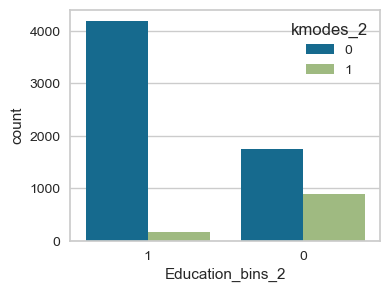

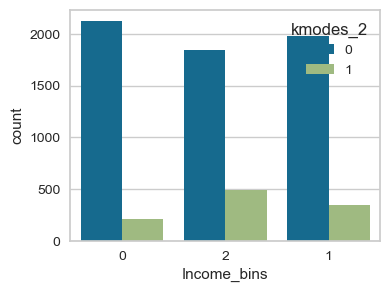

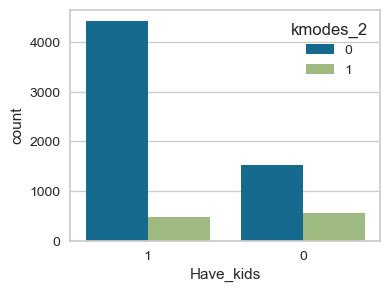

In [175]:
var = demo_e_kmodes[['Education_bins_2', 'Marital_Status_2', 'Income_bins', 'Have_kids']]

for i in var:
    plt.subplots(figsize=(4,3))
    sns.countplot(x = var[i], order = var[i].value_counts().index, hue = demo_e_kmodes['kmodes_2'])
    plt.show()

## Data Visualization for k = 3

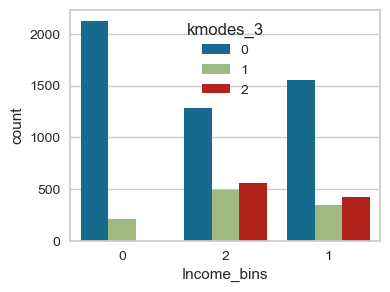

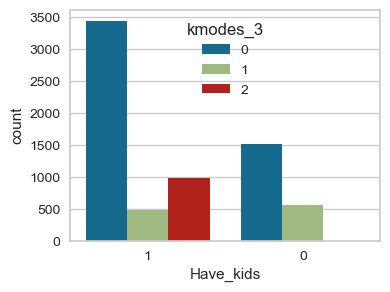

In [176]:
for i in var:
    plt.subplots(figsize=(4,3))
    sns.countplot(x = var[i], order = var[i].value_counts().index, hue = demo_e_kmodes['kmodes_3'])
    plt.show()

## Data Visualization for k = 4

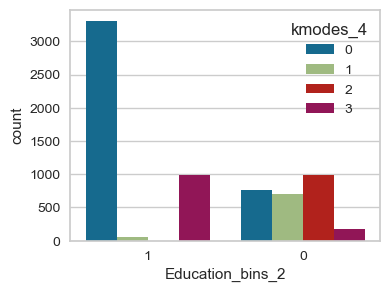

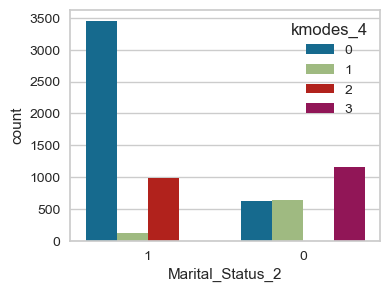

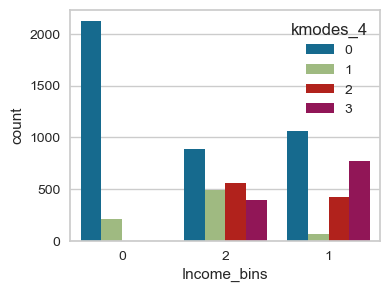

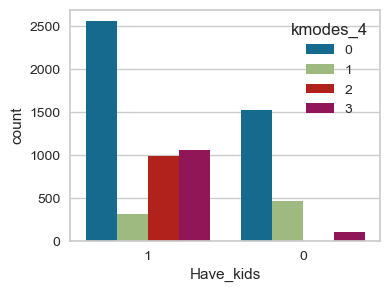

In [177]:
for i in var:
    plt.subplots(figsize=(4,3))
    sns.countplot(x = var[i], order = var[i].value_counts().index, hue = demo_e_kmodes['kmodes_4'])
    plt.show()

## Interpretations 

- k = 2

- Cluster 0: Customers with high education, together, low income (really well balanced), with kids
- Cluster 1: Customers with low education, single, without kids (really well balanced)

- k = 3

- Cluster 0: Customers with high education, together, low income (distributed), with kids
- Cluster 1: Customers with low education, single, high income (well distributed), without kids (556 but w/ kids-483)
- Cluster 2: Customers with low education (0 cust with high), together, high and medium income (0 low), with kids

- k = 4

- Cluster 0: Customers with high education, together, low income and with kids
- Cluster 1: Customers with low education, single, high income, no kids (well distributed)
- Cluster 2: Customers with low education, together, high income (distributed w/ medium), w/ kids
- Cluster 3: Customers with high education, single, medium income, with kids